In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
imdb_tile = pd.read_csv("../data/title.basics.tsv", sep="\t")
imdb_tile.head()

/var/folders/pl/c7g80gxj4s73_9l3hjt60zm80000gn/T/ipykernel_54323/2451371627.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_tile = pd.read_csv("../data/title.basics.tsv", sep="\t")


tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short

In [4]:
imdb_title_movies = imdb_tile[imdb_tile["titleType"] == "movie"]
imdb_title_movies

tconst titleType  \
8         tt0000009     movie   
144       tt0000147     movie   
498       tt0000502     movie   
570       tt0000574     movie   
587       tt0000591     movie   
...             ...       ...   
11407829  tt9916622     movie   
11407856  tt9916680     movie   
11407868  tt9916706     movie   
11407878  tt9916730     movie   
11407888  tt9916754     movie   

                                               primaryTitle  \
8                                                Miss Jerry   
144                           The Corbett-Fitzsimmons Fight   
498                                                Bohemios   
570                             The Story of the Kelly Gang   
587                                        The Prodigal Son   
...                                                     ...   
11407829        Rodolpho Teóphilo - O Legado de um Pioneiro   
11407856  De la ilusión al desconcierto: cine colombiano...   
11407868                                    Dankyavar Danka   
11407878                                             6 Gunn   
11407888                     Chico Albuquerque - Revelações   

                                              originalTitle isAdult startYear  \
8                                                Miss Jerry       0      1894   
144                           The Corbett-Fitzsimmons Fight       0      1897   
498                                                Bohemios       0      1905   
570                             The Story of the Kelly Gang       0      1906   
587                                       L'enfant prodigue       0      1907   
...                                                     ...     ...       ...   
11407829        Rodolpho Teóphilo - O Legado de um Pioneiro       0      2015   
11407856  De la ilusión al desconcierto: cine colombiano...       0      2007   
11407868                                    Dankyavar Danka       0      2013   
11407878                                             6 Gunn       0      2017   
11407888                     Chico Albuquerque - Revelações       0      2013   

         endYear runtimeMinutes                      genres  
8             \N             45                     Romance  
144           \N            100      Documentary,News,Sport  
498           \N            100                          \N  
570           \N             70  Action,Adventure,Biography  
587           \N             90                       Drama  
...          ...            ...                         ...  
11407829      \N             57                 Documentary  
11407856      \N            100                 Documentary  
11407868      \N             \N                      Comedy  
11407878      \N            116                       Drama  
11407888      \N             49                 Documentary  

[704330 rows x 9 columns]

In [5]:
imdb_rating = pd.read_csv("../data/title.ratings.tsv", sep="\t")
imdb_rating.head()

tconst  averageRating  numVotes
0  tt0000001            5.7      2120
1  tt0000002            5.6       286
2  tt0000003            6.4      2158
3  tt0000004            5.3       183
4  tt0000005            6.2      2886

In [6]:
imdb_raw = pd.merge(imdb_title_movies, imdb_rating, on="tconst")
imdb_raw.head()

tconst titleType                   primaryTitle  \
0  tt0000009     movie                     Miss Jerry   
1  tt0000147     movie  The Corbett-Fitzsimmons Fight   
2  tt0000502     movie                       Bohemios   
3  tt0000574     movie    The Story of the Kelly Gang   
4  tt0000591     movie               The Prodigal Son   

                   originalTitle isAdult startYear endYear runtimeMinutes  \
0                     Miss Jerry       0      1894      \N             45   
1  The Corbett-Fitzsimmons Fight       0      1897      \N            100   
2                       Bohemios       0      1905      \N            100   
3    The Story of the Kelly Gang       0      1906      \N             70   
4              L'enfant prodigue       0      1907      \N             90   

                       genres  averageRating  numVotes  
0                     Romance            5.4       218  
1      Documentary,News,Sport            5.2       547  
2                          \N            3.8        20  
3  Action,Adventure,Biography            6.0       966  
4                       Drama            5.6        30

In [7]:
imdb_raw['numVotes'] = imdb_raw['numVotes'].astype(int)
imdb = imdb_raw.loc[imdb_raw.groupby('originalTitle')['numVotes'].idxmax()]
imdb

tconst titleType           primaryTitle          originalTitle  \
247054  tt28240550     movie                      #                      #   
232573   tt2346170     movie       #1 Serial Killer       #1 Serial Killer   
159623  tt10985348     movie             #1915House             #1915House   
255953   tt3120962     movie                     #5                     #5   
277640   tt4470336     movie             #50Fathers             #50Fathers   
...            ...       ...                    ...                    ...   
270305   tt3823018     movie               Sparrows                Þrestir   
125891   tt0365841     movie         The Third Name           Þriðja nafni   
278997   tt4597220     movie                  Redux                   Þrot   
285841   tt5217114     movie  à propos: philosophie  à propos: philosophie   
265884   tt3509772     movie                 ärtico                 ärtico   

       isAdult startYear endYear runtimeMinutes                    genres  \
247054       0      2022      \N             90                     Drama   
232573       0      2013      \N             87                    Horror   
159623       0      2018      \N             55           Horror,Thriller   
255953       0      2013      \N             68  Biography,Comedy,Fantasy   
277640       0      2015      \N            132                    Comedy   
...        ...       ...     ...            ...                       ...   
270305       0      2015      \N             99                     Drama   
125891       0      2003      \N             88      Comedy,Drama,Romance   
278997       0      2023      \N             91            Drama,Thriller   
285841       0      2016      \N             80               Documentary   
265884       0      2014      \N             78                     Drama   

        averageRating  numVotes  
247054            3.6         6  
232573            5.4        76  
159623            3.4        20  
255953            4.5        22  
277640            3.7        12  
...               ...       ...  
270305            6.8      1727  
125891            6.1        43  
278997            5.6        17  
285841            8.5         8  
265884            5.6       125  

[296890 rows x 11 columns]

In [8]:
def transform_to_movie_title_key(title):
    title = title.lower()
    title = re.sub(r"[^a-z0-9\s]", "", title)
    title = re.sub(r"\s+", "_", title)
    return title

In [9]:
imdb['originalTitle'] = imdb['originalTitle'].astype(str)

In [10]:
imdb['movie_key'] = imdb['originalTitle'].apply(transform_to_movie_title_key)
imdb

tconst titleType           primaryTitle          originalTitle  \
247054  tt28240550     movie                      #                      #   
232573   tt2346170     movie       #1 Serial Killer       #1 Serial Killer   
159623  tt10985348     movie             #1915House             #1915House   
255953   tt3120962     movie                     #5                     #5   
277640   tt4470336     movie             #50Fathers             #50Fathers   
...            ...       ...                    ...                    ...   
270305   tt3823018     movie               Sparrows                Þrestir   
125891   tt0365841     movie         The Third Name           Þriðja nafni   
278997   tt4597220     movie                  Redux                   Þrot   
285841   tt5217114     movie  à propos: philosophie  à propos: philosophie   
265884   tt3509772     movie                 ärtico                 ärtico   

       isAdult startYear endYear runtimeMinutes                    genres  \
247054       0      2022      \N             90                     Drama   
232573       0      2013      \N             87                    Horror   
159623       0      2018      \N             55           Horror,Thriller   
255953       0      2013      \N             68  Biography,Comedy,Fantasy   
277640       0      2015      \N            132                    Comedy   
...        ...       ...     ...            ...                       ...   
270305       0      2015      \N             99                     Drama   
125891       0      2003      \N             88      Comedy,Drama,Romance   
278997       0      2023      \N             91            Drama,Thriller   
285841       0      2016      \N             80               Documentary   
265884       0      2014      \N             78                     Drama   

        averageRating  numVotes            movie_key  
247054            3.6         6                       
232573            5.4        76      1_serial_killer  
159623            3.4        20            1915house  
255953            4.5        22                    5  
277640            3.7        12            50fathers  
...               ...       ...                  ...  
270305            6.8      1727               restir  
125891            6.1        43           rija_nafni  
278997            5.6        17                  rot  
285841            8.5         8  _propos_philosophie  
265884            5.6       125                rtico  

[296890 rows x 12 columns]

In [11]:
rotten_tomatoes = pd.read_csv("../data/rotten_tomatoes_api_data_raw.csv")
rotten_tomatoes.head()

title critics_score users_score
0            the_green_mile           79%         94%
1  the_shawshank_redemption           89%         98%
2              forrest_gump           75%         95%
3       requiem_for_a_dream           78%         93%
4                the_matrix           83%         85%

In [12]:
filmweb = pd.read_csv("../data/filmweb_data_raw_ver3.csv")
filmweb.head()

title             originalTitle          premiere  \
0          Zielona mila            The Green Mile    6 grudnia 1999   
1  Skazani na Shawshank  The Shawshank Redemption  10 września 1994   
2          Forrest Gump              Forrest Gump   23 czerwca 1994   
3       Leon zawodowiec                      Léon  14 września 1994   
4       Requiem dla snu       Requiem for a Dream      14 maja 2000   

   premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0          1999    3h 8m     286801374.0   136801374.0   
1          1994   2h 22m      28884504.0    28767189.0   
2          1994   2h 22m     678226465.0   330455270.0   
3          1994   1h 50m      19569225.0    19501238.0   
4          2000   1h 42m       7390108.0     3635482.0   

   boxOfficeRestOfTheWorld      budget  \
0              150000000.0  60000000.0   
1                 117315.0  25000000.0   
2              347771195.0  55000000.0   
3                  67987.0  16000000.0   
4                3754626.0   4500000.0   

                                              studio  ...          scenario  \
0  Castle Rock Entertainment (przedstawia)  /  Da...  ...    Frank Darabont   
1            Castle Rock Entertainment (przedstawia)  ...    Frank Darabont   
2  Paramount Pictures (przedstawia)  /  Steve Tis...  ...         Eric Roth   
3     Gaumont (przedstawia)  /  Les Films du Dauphin  ...        Luc Besson   
4  Artisan Entertainment (przedstawia)  /  Thousa...  ...  Darren Aronofsky   

      mainActor1      mainActor2         mainActor3             mainActor4  \
0      Tom Hanks     David Morse        Bonnie Hunt  Michael Clarke Duncan   
1    Tim Robbins  Morgan Freeman         Bob Gunton         William Sadler   
2      Tom Hanks    Robin Wright        Sally Field            Gary Sinise   
3      Jean Reno     Gary Oldman    Natalie Portman           Danny Aiello   
4  Ellen Burstyn      Jared Leto  Jennifer Connelly          Marlon Wayans   

             mainActor5                mainActor6     mainActor7  \
0        James Cromwell             Michael Jeter  Graham Greene   
1          Clancy Brown               Gil Bellows   Mark Rolston   
2    Mykelti Williamson  Michael Conner Humphreys     Hanna Hall   
3           Peter Appel          Willie One Blood     Don Creech   
4  Christopher McDonald             Louise Lasser    Keith David   

          mainActor8         mainActor9  
0     Doug Hutchison       Sam Rockwell  
1     James Whitmore  Larry Brandenburg  
2  Haley Joel Osment        Nora Dunfee  
3   Keith A. Glascoe     Randolph Scott  
4      Sean Gullette       Denise Dowse  

[5 rows x 26 columns]

In [13]:
filmweb['movie_key'] = filmweb['originalTitle'].apply(transform_to_movie_title_key)
filmweb['year'] = filmweb['premiere'].str.split().str[-1]
filmweb

title                       originalTitle  \
0                        Zielona mila                      The Green Mile   
1                Skazani na Shawshank            The Shawshank Redemption   
2                        Forrest Gump                        Forrest Gump   
3                     Leon zawodowiec                                Léon   
4                     Requiem dla snu                 Requiem for a Dream   
...                               ...                                 ...   
9886                  Gusta i guściki                  Le goût des autres   
9887                Skryta namiętność                       Untamed Heart   
9888                            A Sun                  Yang Guang Pu Zhao   
9889  Baranek Shaun Film. Farmageddon  Shaun the Sheep Movie: Farmageddon   
9890              Zemsta rewolwerowca                The Harder They Fall   

                 premiere  premiereYear duration  boxOfficeWorld  \
0          6 grudnia 1999          1999    3h 8m     286801374.0   
1        10 września 1994          1994   2h 22m      28884504.0   
2         23 czerwca 1994          1994   2h 22m     678226465.0   
3        14 września 1994          1994   1h 50m      19569225.0   
4            14 maja 2000          2000   1h 42m       7390108.0   
...                   ...           ...      ...             ...   
9886         1 marca 2000          2000   1h 52m      21424164.0   
9887       12 lutego 1993          1993   1h 42m             NaN   
9888      6 września 2019          2019   2h 36m             NaN   
9889     26 września 2019          2019   1h 26m      43121792.0   
9890  6 października 2021          2021   2h 10m             NaN   

      boxOfficeUSA  boxOfficeRestOfTheWorld      budget  \
0      136801374.0              150000000.0  60000000.0   
1       28767189.0                 117315.0  25000000.0   
2      330455270.0              347771195.0  55000000.0   
3       19501238.0                  67987.0  16000000.0   
4        3635482.0                3754626.0   4500000.0   
...            ...                      ...         ...   
9886      891369.0               20532795.0         NaN   
9887    18898806.0                      NaN         NaN   
9888           NaN                      NaN         NaN   
9889           NaN               43121792.0         NaN   
9890           NaN                      NaN         NaN   

                                                 studio  ...  \
0     Castle Rock Entertainment (przedstawia)  /  Da...  ...   
1               Castle Rock Entertainment (przedstawia)  ...   
2     Paramount Pictures (przedstawia)  /  Steve Tis...  ...   
3        Gaumont (przedstawia)  /  Les Films du Dauphin  ...   
4     Artisan Entertainment (przedstawia)  /  Thousa...  ...   
...                                                 ...  ...   
9886        Canal+  /  France 2 Cinéma  /  Les Films A4  ...   
9887                          Metro-Goldwyn-Mayer (MGM)  ...   
9888                                          3 Ng Film  ...   
9889  Aardman Animations  /  Anton Capital Entertain...  ...   
9890                Netflix  /  Overbrook Entertainment  ...   

                mainActor2         mainActor3             mainActor4  \
0              David Morse        Bonnie Hunt  Michael Clarke Duncan   
1           Morgan Freeman         Bob Gunton         William Sadler   
2             Robin Wright        Sally Field            Gary Sinise   
3              Gary Oldman    Natalie Portman           Danny Aiello   
4               Jared Leto  Jennifer Connelly          Marlon Wayans   
...                    ...                ...                    ...   
9886     Jean-Pierre Bacri       Alain Chabat            Agnès Jaoui   
9887          Marisa Tomei        Rosie Perez             Kyle Secor   
9888  Samantha Shu-chin Ko      Kuan-Ting Liu           Greg Han Hsu   
9889          John Sparkes      Chris Morrell             Andy Nyman   
9890           Regin

In [14]:
full_df = pd.merge(filmweb, imdb, left_on=['movie_key', 'year'], right_on=['movie_key', 'startYear'], how="inner")
full_df

title           originalTitle_x              premiere  \
0             Zielona mila            The Green Mile        6 grudnia 1999   
1     Skazani na Shawshank  The Shawshank Redemption      10 września 1994   
2             Forrest Gump              Forrest Gump       23 czerwca 1994   
3          Leon zawodowiec                      Léon      14 września 1994   
4          Requiem dla snu       Requiem for a Dream          14 maja 2000   
...                    ...                       ...                   ...   
7979            Prawo krwi               Next of Kin  20 października 1989   
7980     Wszystko o Adamie                About Adam      28 stycznia 2000   
7981       Gusta i guściki        Le goût des autres          1 marca 2000   
7982     Skryta namiętność             Untamed Heart        12 lutego 1993   
7983   Zemsta rewolwerowca      The Harder They Fall   6 października 2021   

      premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0             1999    3h 8m     286801374.0   136801374.0   
1             1994   2h 22m      28884504.0    28767189.0   
2             1994   2h 22m     678226465.0   330455270.0   
3             1994   1h 50m      19569225.0    19501238.0   
4             2000   1h 42m       7390108.0     3635482.0   
...            ...      ...             ...           ...   
7979          1989   1h 48m             NaN    15942628.0   
7980          2000   1h 45m             NaN           NaN   
7981          2000   1h 52m      21424164.0      891369.0   
7982          1993   1h 42m             NaN    18898806.0   
7983          2021   2h 10m             NaN           NaN   

      boxOfficeRestOfTheWorld      budget  \
0                 150000000.0  60000000.0   
1                    117315.0  25000000.0   
2                 347771195.0  55000000.0   
3                     67987.0  16000000.0   
4                   3754626.0   4500000.0   
...                       ...         ...   
7979                      NaN  12000000.0   
7980                      NaN         NaN   
7981               20532795.0         NaN   
7982                      NaN         NaN   
7983                      NaN         NaN   

                                                 studio  ...  titleType  \
0     Castle Rock Entertainment (przedstawia)  /  Da...  ...      movie   
1               Castle Rock Entertainment (przedstawia)  ...      movie   
2     Paramount Pictures (przedstawia)  /  Steve Tis...  ...      movie   
3        Gaumont (przedstawia)  /  Les Films du Dauphin  ...      movie   
4     Artisan Entertainment (przedstawia)  /  Thousa...  ...      movie   
...                                                 ...  ...        ...   
7979                         Lorimar Film Entertainment  ...      movie   
7980  Bórd Scannán na hÉireann  /  British Broadcast...  ...      movie   
7981        Canal+  /  France 2 Cinéma  /  Les Films A4  ...      movie   
7982                          Metro-Goldwyn-Mayer (MGM)  ...      movie   
7983                Netflix  /  Overbrook Entertainment  ...      movie   

                  primaryTitle           originalTitle_y isAdult startYear  \
0               The Green Mile            The Green Mile       0      1999   
1     The Shawshank Redemption  The Shawshank Redemption       0      1994   
2                 Forrest Gump              Forrest Gump       0      1994   
3       Léon: The Professional                      Léon       0      1994   
4          Requiem for a Dream       Requiem for a Dream       0      2000   
...                        ...                       ...     ...       ...   
7979               Next of Kin               Next of Kin       0      1989   
7980                About Adam                About Adam       0      2000   
7981       The Taste of Others        Le goût des autres       0      2000   
7982             Untamed Heart             Untamed Heart       0      1993   
7983      The Harder They Fall      The Harder They

In [15]:
df = full_df.groupby('originalTitle_x').filter(lambda x: len(x) == 1)
df

title           originalTitle_x              premiere  \
0             Zielona mila            The Green Mile        6 grudnia 1999   
1     Skazani na Shawshank  The Shawshank Redemption      10 września 1994   
2             Forrest Gump              Forrest Gump       23 czerwca 1994   
3          Leon zawodowiec                      Léon      14 września 1994   
4          Requiem dla snu       Requiem for a Dream          14 maja 2000   
...                    ...                       ...                   ...   
7979            Prawo krwi               Next of Kin  20 października 1989   
7980     Wszystko o Adamie                About Adam      28 stycznia 2000   
7981       Gusta i guściki        Le goût des autres          1 marca 2000   
7982     Skryta namiętność             Untamed Heart        12 lutego 1993   
7983   Zemsta rewolwerowca      The Harder They Fall   6 października 2021   

      premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0             1999    3h 8m     286801374.0   136801374.0   
1             1994   2h 22m      28884504.0    28767189.0   
2             1994   2h 22m     678226465.0   330455270.0   
3             1994   1h 50m      19569225.0    19501238.0   
4             2000   1h 42m       7390108.0     3635482.0   
...            ...      ...             ...           ...   
7979          1989   1h 48m             NaN    15942628.0   
7980          2000   1h 45m             NaN           NaN   
7981          2000   1h 52m      21424164.0      891369.0   
7982          1993   1h 42m             NaN    18898806.0   
7983          2021   2h 10m             NaN           NaN   

      boxOfficeRestOfTheWorld      budget  \
0                 150000000.0  60000000.0   
1                    117315.0  25000000.0   
2                 347771195.0  55000000.0   
3                     67987.0  16000000.0   
4                   3754626.0   4500000.0   
...                       ...         ...   
7979                      NaN  12000000.0   
7980                      NaN         NaN   
7981               20532795.0         NaN   
7982                      NaN         NaN   
7983                      NaN         NaN   

                                                 studio  ...  titleType  \
0     Castle Rock Entertainment (przedstawia)  /  Da...  ...      movie   
1               Castle Rock Entertainment (przedstawia)  ...      movie   
2     Paramount Pictures (przedstawia)  /  Steve Tis...  ...      movie   
3        Gaumont (przedstawia)  /  Les Films du Dauphin  ...      movie   
4     Artisan Entertainment (przedstawia)  /  Thousa...  ...      movie   
...                                                 ...  ...        ...   
7979                         Lorimar Film Entertainment  ...      movie   
7980  Bórd Scannán na hÉireann  /  British Broadcast...  ...      movie   
7981        Canal+  /  France 2 Cinéma  /  Les Films A4  ...      movie   
7982                          Metro-Goldwyn-Mayer (MGM)  ...      movie   
7983                Netflix  /  Overbrook Entertainment  ...      movie   

                  primaryTitle           originalTitle_y isAdult startYear  \
0               The Green Mile            The Green Mile       0      1999   
1     The Shawshank Redemption  The Shawshank Redemption       0      1994   
2                 Forrest Gump              Forrest Gump       0      1994   
3       Léon: The Professional                      Léon       0      1994   
4          Requiem for a Dream       Requiem for a Dream       0      2000   
...                        ...                       ...     ...       ...   
7979               Next of Kin               Next of Kin       0      1989   
7980                About Adam                About Adam       0      2000   
7981       The Taste of Others        Le goût des autres       0      2000   
7982             Untamed Heart             Untamed Heart       0      1993   
7983      The Harder They Fall      The Harder They

In [16]:
full_scraped_df = pd.merge(df, rotten_tomatoes, left_on='movie_key', right_on='title', how="inner")
full_scraped_df

title_x           originalTitle_x              premiere  \
0             Zielona mila            The Green Mile        6 grudnia 1999   
1     Skazani na Shawshank  The Shawshank Redemption      10 września 1994   
2             Forrest Gump              Forrest Gump       23 czerwca 1994   
3          Requiem dla snu       Requiem for a Dream          14 maja 2000   
4                   Matrix                The Matrix         24 marca 1999   
...                    ...                       ...                   ...   
6196         Edukacja Rity            Educating Rita      14 września 1983   
6197            Prawo krwi               Next of Kin  20 października 1989   
6198     Wszystko o Adamie                About Adam      28 stycznia 2000   
6199     Skryta namiętność             Untamed Heart        12 lutego 1993   
6200   Zemsta rewolwerowca      The Harder They Fall   6 października 2021   

      premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0             1999    3h 8m     286801374.0   136801374.0   
1             1994   2h 22m      28884504.0    28767189.0   
2             1994   2h 22m     678226465.0   330455270.0   
3             2000   1h 42m       7390108.0     3635482.0   
4             1999   2h 16m     467222728.0   172076928.0   
...            ...      ...             ...           ...   
6196          1983   1h 50m             NaN    14648076.0   
6197          1989   1h 48m             NaN    15942628.0   
6198          2000   1h 45m             NaN           NaN   
6199          1993   1h 42m             NaN    18898806.0   
6200          2021   2h 10m             NaN           NaN   

      boxOfficeRestOfTheWorld      budget  \
0                 150000000.0  60000000.0   
1                    117315.0  25000000.0   
2                 347771195.0  55000000.0   
3                   3754626.0   4500000.0   
4                 295145800.0  63000000.0   
...                       ...         ...   
6196                      NaN         NaN   
6197                      NaN  12000000.0   
6198                      NaN         NaN   
6199                      NaN         NaN   
6200                      NaN         NaN   

                                                 studio  ...  isAdult  \
0     Castle Rock Entertainment (przedstawia)  /  Da...  ...        0   
1               Castle Rock Entertainment (przedstawia)  ...        0   
2     Paramount Pictures (przedstawia)  /  Steve Tis...  ...        0   
3     Artisan Entertainment (przedstawia)  /  Thousa...  ...        0   
4     Warner Bros. (przedstawia)  /  Silver Pictures...  ...        0   
...                                                 ...  ...      ...   
6196                                     Acorn Pictures  ...        0   
6197                         Lorimar Film Entertainment  ...        0   
6198  Bórd Scannán na hÉireann  /  British Broadcast...  ...        0   
6199                          Metro-Goldwyn-Mayer (MGM)  ...        0   
6200                Netflix  /  Overbrook Entertainment  ...        0   

     startYear  endYear runtimeMinutes                genres averageRating  \
0         1999       \N            189   Crime,Drama,Fantasy           8.6   
1         1994       \N            142                 Drama           9.3   
2         1994       \N            142         Drama,Romance           8.8   
3         2000       \N            102                 Drama           8.3   
4         1999       \N            136         Action,Sci-Fi           8.7   
...        ...      ...            ...                   ...           ...   
6196      1983       \N            110          Comedy,Drama           7.2   
6197      1989       \N            108    Action,Crime,Drama           5.9   
6198      2000       \N             97        Comedy,Romance           5.8   
6199      1993       \N            102         Drama,Romance           6.8   
6200      2021       \N            139  Action,Drama,Western           6.

In [17]:
full_scraped_df[full_scraped_df['title_x'].isna()]

Empty DataFrame
Columns: [title_x, originalTitle_x, premiere, premiereYear, duration, boxOfficeWorld, boxOfficeUSA, boxOfficeRestOfTheWorld, budget, studio, criticsNote, criticsNotesNumber, usersNote, usersNotesNumber, productionCountry, director, scenario, mainActor1, mainActor2, mainActor3, mainActor4, mainActor5, mainActor6, mainActor7, mainActor8, mainActor9, movie_key, year, tconst, titleType, primaryTitle, originalTitle_y, isAdult, startYear, endYear, runtimeMinutes, genres, averageRating, numVotes, title_y, critics_score, users_score]
Index: []

[0 rows x 42 columns]

In [18]:
film_rotten = pd.merge(filmweb, rotten_tomatoes, left_on='movie_key', right_on='title', how="right")
film_rotten

title_x             originalTitle             premiere  \
0             Zielona mila            The Green Mile       6 grudnia 1999   
1     Skazani na Shawshank  The Shawshank Redemption     10 września 1994   
2             Forrest Gump              Forrest Gump      23 czerwca 1994   
3          Requiem dla snu       Requiem for a Dream         14 maja 2000   
4                   Matrix                The Matrix        24 marca 1999   
...                    ...                       ...                  ...   
7409                   NaN                       NaN                  NaN   
7410                   NaN                       NaN                  NaN   
7411           Podpalaczka               Firestarter          9 maja 1984   
7412                   NaN                       NaN                  NaN   
7413   Zemsta rewolwerowca      The Harder They Fall  6 października 2021   

      premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0           1999.0    3h 8m     286801374.0   136801374.0   
1           1994.0   2h 22m      28884504.0    28767189.0   
2           1994.0   2h 22m     678226465.0   330455270.0   
3           2000.0   1h 42m       7390108.0     3635482.0   
4           1999.0   2h 16m     467222728.0   172076928.0   
...            ...      ...             ...           ...   
7409           NaN      NaN             NaN           NaN   
7410           NaN      NaN             NaN           NaN   
7411        1984.0   1h 54m             NaN    17080167.0   
7412           NaN      NaN             NaN           NaN   
7413        2021.0   2h 10m             NaN           NaN   

      boxOfficeRestOfTheWorld      budget  \
0                 150000000.0  60000000.0   
1                    117315.0  25000000.0   
2                 347771195.0  55000000.0   
3                   3754626.0   4500000.0   
4                 295145800.0  63000000.0   
...                       ...         ...   
7409                      NaN         NaN   
7410                      NaN         NaN   
7411                      NaN  15000000.0   
7412                      NaN         NaN   
7413                      NaN         NaN   

                                                 studio  ...  \
0     Castle Rock Entertainment (przedstawia)  /  Da...  ...   
1               Castle Rock Entertainment (przedstawia)  ...   
2     Paramount Pictures (przedstawia)  /  Steve Tis...  ...   
3     Artisan Entertainment (przedstawia)  /  Thousa...  ...   
4     Warner Bros. (przedstawia)  /  Silver Pictures...  ...   
...                                                 ...  ...   
7409                                                NaN  ...   
7410                                                NaN  ...   
7411  Dino De Laurentiis Company  /  Universal Pictures  ...   
7412                                                NaN  ...   
7413                Netflix  /  Overbrook Entertainment  ...   

                mainActor5                mainActor6     mainActor7  \
0           James Cromwell             Michael Jeter  Graham Greene   
1             Clancy Brown               Gil Bellows   Mark Rolston   
2       Mykelti Williamson  Michael Conner Humphreys     Hanna Hall   
3     Christopher McDonald             Louise Lasser    Keith David   
4            Gloria Foster            Joe Pantoliano   Marcus Chong   
...                    ...                       ...            ...   
7409                   NaN                       NaN            NaN   
7410                   NaN                       NaN            NaN   
7411         Keith Colbert             Curtis Credel    Drew Snyder   
7412                   NaN                       NaN            NaN   
7413      Mark Rhino Smith               Edi Gathegi  Woody McClain   

              mainActor8         mainActor9                 movie_key  year  \
0         Doug Hutchison       Sam Rockwell            the_green_mile  1999   
1         James Whitmore  Larry Brandenb

In [19]:
print(list(full_scraped_df.columns))

['title_x', 'originalTitle_x', 'premiere', 'premiereYear', 'duration', 'boxOfficeWorld', 'boxOfficeUSA', 'boxOfficeRestOfTheWorld', 'budget', 'studio', 'criticsNote', 'criticsNotesNumber', 'usersNote', 'usersNotesNumber', 'productionCountry', 'director', 'scenario', 'mainActor1', 'mainActor2', 'mainActor3', 'mainActor4', 'mainActor5', 'mainActor6', 'mainActor7', 'mainActor8', 'mainActor9', 'movie_key', 'year', 'tconst', 'titleType', 'primaryTitle', 'originalTitle_y', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'title_y', 'critics_score', 'users_score']


In [20]:
print(full_scraped_df.dtypes)

title_x                     object
originalTitle_x             object
premiere                    object
premiereYear                 int64
duration                    object
boxOfficeWorld             float64
boxOfficeUSA               float64
boxOfficeRestOfTheWorld    float64
budget                     float64
studio                      object
criticsNote                float64
criticsNotesNumber          object
usersNote                  float64
usersNotesNumber            object
productionCountry           object
director                    object
scenario                    object
mainActor1                  object
mainActor2                  object
mainActor3                  object
mainActor4                  object
mainActor5                  object
mainActor6                  object
mainActor7                  object
mainActor8                  object
mainActor9                  object
movie_key                   object
year                        object
tconst              

In [21]:
full_scraped_df['premiereYear'] = full_scraped_df['premiereYear'].astype('Int64')
full_scraped_df['year'] = full_scraped_df['year'].astype('Int64')
full_scraped_df['duration_minutes'] = full_scraped_df['duration'].str.extract('(\d+)h (\d+)m').astype(float).dot([60, 1])
full_scraped_df['critics_score_percent'] = full_scraped_df['critics_score'].str.rstrip('%').astype(float)
full_scraped_df['users_score_percent'] = full_scraped_df['users_score'].str.rstrip('%').astype(float)
print(full_scraped_df.dtypes)

title_x                     object
originalTitle_x             object
premiere                    object
premiereYear                 Int64
duration                    object
boxOfficeWorld             float64
boxOfficeUSA               float64
boxOfficeRestOfTheWorld    float64
budget                     float64
studio                      object
criticsNote                float64
criticsNotesNumber          object
usersNote                  float64
usersNotesNumber            object
productionCountry           object
director                    object
scenario                    object
mainActor1                  object
mainActor2                  object
mainActor3                  object
mainActor4                  object
mainActor5                  object
mainActor6                  object
mainActor7                  object
mainActor8                  object
mainActor9                  object
movie_key                   object
year                         Int64
tconst              

In [22]:
print("\nMissing values per column:")
missing_counts = full_scraped_df.isnull().sum()
print(missing_counts)


Missing values per column:
title_x                       0
originalTitle_x               0
premiere                      0
premiereYear                  0
duration                      0
boxOfficeWorld             2308
boxOfficeUSA               1591
boxOfficeRestOfTheWorld    2309
budget                     2552
studio                       45
criticsNote                 567
criticsNotesNumber          567
usersNote                     0
usersNotesNumber              0
productionCountry             0
director                      0
scenario                     62
mainActor1                    0
mainActor2                   11
mainActor3                   30
mainActor4                   42
mainActor5                   59
mainActor6                   70
mainActor7                   86
mainActor8                  104
mainActor9                  126
movie_key                     0
year                          0
tconst                        0
titleType                     0
primaryTitle

In [23]:
cat_cols = [
    'studio', 'scenario',
    'mainActor2', 'mainActor3', 'mainActor4',
    'mainActor5', 'mainActor6', 'mainActor7', 'mainActor8', 'mainActor9'
]

for col in cat_cols:
    full_scraped_df.loc[:, col] = full_scraped_df[col].fillna('Unknown')

In [24]:
unknown_counts = (full_scraped_df[cat_cols] == "Unknown").sum()

print("Count of 'Unknown' values per column:\n", unknown_counts)

Count of 'Unknown' values per column:
 studio         45
scenario       62
mainActor2     11
mainActor3     30
mainActor4     42
mainActor5     59
mainActor6     70
mainActor7     86
mainActor8    104
mainActor9    126
dtype: int64


In [25]:
unique_studios = full_scraped_df['studio'].dropna().unique()

for studio in unique_studios:
    print(studio)

print(f"\nTotal Unique Studios: {len(unique_studios)}")

Castle Rock Entertainment (przedstawia)  /  Darkwoods Productions (produkcja)  /  Warner Bros.
Castle Rock Entertainment (przedstawia)
Paramount Pictures (przedstawia)  /  Steve Tisch Company, The (produkcja)  /  Wendy Finerman Productions (produkcja)
Artisan Entertainment (przedstawia)  /  Thousand Words (przedstawia)  /  Protozoa Pictures (produkcja) / więcej
Warner Bros. (przedstawia)  /  Silver Pictures (produkcja)  /  Earth Media Studios (postprodukcja) / więcej
Orion Pictures Corporation  /  Strong Heart/Demme Production
DreamWorks SKG (przedstawia)  /  Universal Pictures (przedstawia)  /  C & L / więcej
Dune Entertainment (współudział)  /  Ingenious Film Partners (współudział)  /  Lightstorm Entertainment / więcej
Miramax Films (przedstawia)  /  A Band Apart  /  Jersey Films
Fox 2000 Pictures (przedstawia)  /  Regency Enterprises (przedstawia)  /  Atman Entertainment / więcej
DreamWorks Animation  /  DreamWorks SKG  /  Pacific Data Images (PDI) / więcej
DreamWorks SKG (przedstaw

In [26]:
def clean_studio_names(studio_string):
    if isinstance(studio_string, str):

        studios = [s.strip() for s in studio_string.split('/')]

        unwanted_phrases = [
            r'\(przedstawia\)', r'\(produkcja\)', r'\(postprodukcja\)', r'więcej', 
            r'\(współudział\)', r'\(koprodukcja\)', r'\(niewymienione w czołówce\)', 
            r'\(produkcja wykonawcza\)', r'\(udział\)', r'\(wsparcie\)', r'\(finansowanie\)'
        ]
        pattern = '|'.join(unwanted_phrases)

        cleaned_studios = [re.sub(pattern, '', studio).strip() for studio in studios]
        cleaned_studios = [studio for studio in cleaned_studios if studio]

        return cleaned_studios
    return []

full_scraped_df['cleaned_studios'] = full_scraped_df['studio'].apply(clean_studio_names)

all_cleaned_studios = [studio for sublist in full_scraped_df['cleaned_studios'] for studio in sublist]
unique_cleaned_studios = sorted(set(all_cleaned_studios))

print("\n".join(unique_cleaned_studios))
print(f"\nTotal Unique Cleaned Studios: {len(unique_cleaned_studios)}")

1.85 Films
10 Items
10 West Studios
10 by 10 Entertainment
100 Feet Productions
1019 Entertainment
10th Hole Productions
1185 Films
12 Gauge Productions
120 Films
120dB Films
1212 Entertainment
1492 Pictures
16 Block Productions
1821 Pictures
19 Entertainment
1984 Private Defense Contractors
2 Entertain
2 Entertain Video
2 Film
2 Loop Films
2-Team Productions
2.4.7. Films
2008NY5
20th Century Fox
20th Century Fox Film Corporation
20th Century Studios
21 Laps Entertainment
22 & Indiana Pictures
22h22
23
235 Films
24 Hours Productions
24P Media Group
25th Hour Productions
26 Films
26 Keys Productions
27 Films Production
2929 Productions
2AM
2S Films
3 Art Entertainment
3 Arts Entertainment
3 Dogs and a Pony
3 Legged Dog Films
3 Miles Apart Productions Ltd.
3 in the Box
3000 Miles Productions
30WEST
3311 Productions
33andOut Productions
360 Pictures
39 McLaren St. Sydney
391 Productions
3B Productions
3Foot7
3L Filmproduktion
3ality Digital Entertainment
3sat
4 1
4 Proof Film
40 Acres & A

In [27]:
full_scraped_df['cleaned_studios'] = (
    full_scraped_df['cleaned_studios']
    .fillna("")
    .astype(str) 
)

full_scraped_df['cleaned_studios'] = (
    full_scraped_df['cleaned_studios']
    .str.replace(r"[\[\]']", "", regex=True)
    .str.split(r",\s*")
)

full_scraped_df = full_scraped_df.explode('cleaned_studios', ignore_index=True)

print(full_scraped_df.head())

                title_x           originalTitle_x          premiere  \
0          Zielona mila            The Green Mile    6 grudnia 1999   
1          Zielona mila            The Green Mile    6 grudnia 1999   
2          Zielona mila            The Green Mile    6 grudnia 1999   
3  Skazani na Shawshank  The Shawshank Redemption  10 września 1994   
4          Forrest Gump              Forrest Gump   23 czerwca 1994   

   premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0          1999    3h 8m     286801374.0   136801374.0   
1          1999    3h 8m     286801374.0   136801374.0   
2          1999    3h 8m     286801374.0   136801374.0   
3          1994   2h 22m      28884504.0    28767189.0   
4          1994   2h 22m     678226465.0   330455270.0   

   boxOfficeRestOfTheWorld      budget  \
0              150000000.0  60000000.0   
1              150000000.0  60000000.0   
2              150000000.0  60000000.0   
3                 117315.0  25000000.0   
4             

In [28]:
full_scraped_df

title_x           originalTitle_x             premiere  \
0              Zielona mila            The Green Mile       6 grudnia 1999   
1              Zielona mila            The Green Mile       6 grudnia 1999   
2              Zielona mila            The Green Mile       6 grudnia 1999   
3      Skazani na Shawshank  The Shawshank Redemption     10 września 1994   
4              Forrest Gump              Forrest Gump      23 czerwca 1994   
...                     ...                       ...                  ...   
15840     Wszystko o Adamie                About Adam     28 stycznia 2000   
15841     Wszystko o Adamie                About Adam     28 stycznia 2000   
15842     Skryta namiętność             Untamed Heart       12 lutego 1993   
15843   Zemsta rewolwerowca      The Harder They Fall  6 października 2021   
15844   Zemsta rewolwerowca      The Harder They Fall  6 października 2021   

       premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0              1999    3h 8m     286801374.0   136801374.0   
1              1999    3h 8m     286801374.0   136801374.0   
2              1999    3h 8m     286801374.0   136801374.0   
3              1994   2h 22m      28884504.0    28767189.0   
4              1994   2h 22m     678226465.0   330455270.0   
...             ...      ...             ...           ...   
15840          2000   1h 45m             NaN           NaN   
15841          2000   1h 45m             NaN           NaN   
15842          1993   1h 42m             NaN    18898806.0   
15843          2021   2h 10m             NaN           NaN   
15844          2021   2h 10m             NaN           NaN   

       boxOfficeRestOfTheWorld      budget  \
0                  150000000.0  60000000.0   
1                  150000000.0  60000000.0   
2                  150000000.0  60000000.0   
3                     117315.0  25000000.0   
4                  347771195.0  55000000.0   
...                        ...         ...   
15840                      NaN         NaN   
15841                      NaN         NaN   
15842                      NaN         NaN   
15843                      NaN         NaN   
15844                      NaN         NaN   

                                                  studio  ...  \
0      Castle Rock Entertainment (przedstawia)  /  Da...  ...   
1      Castle Rock Entertainment (przedstawia)  /  Da...  ...   
2      Castle Rock Entertainment (przedstawia)  /  Da...  ...   
3                Castle Rock Entertainment (przedstawia)  ...   
4      Paramount Pictures (przedstawia)  /  Steve Tis...  ...   
...                                                  ...  ...   
15840  Bórd Scannán na hÉireann  /  British Broadcast...  ...   
15841  Bórd Scannán na hÉireann  /  British Broadcast...  ...   
15842                          Metro-Goldwyn-Mayer (MGM)  ...   
15843                Netflix  /  Overbrook Entertainment  ...   
15844                Netflix  /  Overbrook Entertainment  ...   

                     genres averageRating  numVotes                   title_y  \
0       Crime,Drama,Fantasy           8.6   1463244            the_green_mile   
1       Crime,Drama,Fantasy           8.6   1463244            the_green_mile   
2       Crime,Drama,Fantasy           8.6   1463244            the_green_mile   
3                     Drama           9.3   2997106  the_shawshank_redemption   
4             Drama,Romance           8.8   2345005              forrest_gump   
...                     ...           ...       ...                       ...   
15840        Comedy,Romance           5.8      6854                about_adam   
15841        Comedy,Romance           5.8      6854                about_adam   
15842         Drama,Romance           6.8     16004             untamed_heart   
15843  Action,Drama,Western           6.6     73288      the_harder_they_fall   
15844  Action,Drama,Western           6.6     73288      the_harder_they_fall   

      critics_score users_score

In [29]:
full_scraped_df['cleaned_studios'] = full_scraped_df['cleaned_studios'].astype(str)
full_scraped_df['cleaned_studios'] = full_scraped_df['cleaned_studios'].str.replace(r'[\[\]]', '', regex=True)

print(full_scraped_df['cleaned_studios'].value_counts())

cleaned_studios
Warner Bros.                              337
Universal Pictures                        331
Paramount Pictures                        265
The                                       209
Twentieth Century Fox Film Corporation    176
                                         ... 
Paris Film                                  1
Sony Pictures Imageworks (SPI)              1
Jacobson Company                            1
Palmyra Films                               1
Venus Productions                           1
Name: count, Length: 5313, dtype: int64


In [30]:
categorical_cols = [
    'originalTitle', 'cleaned_studios', 'productionCountry', 'director', 'scenario',
    'mainActor1', 'mainActor2', 'mainActor3', 'mainActor4',
    'mainActor5', 'mainActor6', 'mainActor7', 'mainActor8', 'mainActor9'
]

for col in categorical_cols:
    if col in full_scraped_df.columns:
        filtered_df = full_scraped_df[~full_scraped_df[col].str.strip().str.lower().isin(["unknown", "'unknown'"])]

        print(f"\nValue counts for '{col}' (excluding 'Unknown' and variations):")
        print(filtered_df[col].value_counts().head(10))


Value counts for 'cleaned_studios' (excluding 'Unknown' and variations):
cleaned_studios
Warner Bros.                              337
Universal Pictures                        331
Paramount Pictures                        265
The                                       209
Twentieth Century Fox Film Corporation    176
New Line Cinema                           166
Canal+                                    156
Columbia Pictures Corporation             143
Metro-Goldwyn-Mayer (MGM)                 143
Columbia Pictures                         142
Name: count, dtype: int64

Value counts for 'productionCountry' (excluding 'Unknown' and variations):
productionCountry
USA                      7889
USA,  Wielka Brytania     629
Wielka Brytania           544
USA,  Niemcy              390
USA,  Kanada              301
Wielka Brytania,  USA     275
Francja                   268
Polska                    195
USA,  Australia           169
USA,  Francja             154
Name: count, dtype: int64

Val

In [31]:
descriptive_stats = full_scraped_df[['boxOfficeWorld', 'boxOfficeUSA', 'budget', 'duration_minutes', 
                          'critics_score_percent', 'users_score_percent']].describe()

correlation_matrix = full_scraped_df[['boxOfficeWorld', 'boxOfficeUSA', 'budget', 'critics_score_percent', 
                           'users_score_percent']].corr()

print("Descriptive Statistics:\n", descriptive_stats)
print("\nCorrelation Matrix:\n", correlation_matrix)

Descriptive Statistics:
        boxOfficeWorld  boxOfficeUSA        budget  duration_minutes  \
count    1.044600e+04  1.199300e+04  9.616000e+03      15556.000000   
mean     1.336056e+08  5.328602e+07  4.530007e+07        109.054770   
std      2.111966e+08  7.645124e+07  4.751675e+07         20.479516   
min      1.009474e+06  7.420000e+02  7.000000e+03         61.000000   
25%      1.859910e+07  7.329043e+06  1.400000e+07         96.000000   
50%      6.087044e+07  2.853976e+07  3.000000e+07        105.000000   
75%      1.578305e+08  6.613263e+07  6.000000e+07        118.000000   
max      2.923706e+09  9.366622e+08  3.560000e+08        566.000000   

       critics_score_percent  users_score_percent  
count           12672.000000         13858.000000  
mean               60.984770            63.776735  
std                26.962796            20.113787  
min                 0.000000             0.000000  
25%                40.000000            49.000000  
50%                66.0

In [32]:
month_mapping = {
    'stycznia': '01', 'lutego': '02', 'marca': '03',
    'kwietnia': '04', 'maja': '05', 'czerwca': '06',
    'lipca': '07', 'sierpnia': '08', 'września': '09',
    'października': '10', 'listopada': '11', 'grudnia': '12'
}

def convert_date(date_str):
    if isinstance(date_str, str):
        for pl_month, num_month in month_mapping.items():
            date_str = date_str.replace(pl_month, num_month)
    return date_str

full_scraped_df['premiere'] = full_scraped_df['premiere'].apply(convert_date)
full_scraped_df['premiere'] = pd.to_datetime(full_scraped_df['premiere'], format='%d %m %Y', errors='coerce').dt.date

print(full_scraped_df['premiere'].head())

0    1999-12-06
1    1999-12-06
2    1999-12-06
3    1994-09-10
4    1994-06-23
Name: premiere, dtype: object


In [33]:
full_scraped_df['premiere'] = pd.to_datetime(full_scraped_df['premiere'], format='%Y-%m-%d', errors='coerce')

print(full_scraped_df['premiere'].dtype)
print(full_scraped_df['premiere'].head())

datetime64[ns]
0   1999-12-06
1   1999-12-06
2   1999-12-06
3   1994-09-10
4   1994-06-23
Name: premiere, dtype: datetime64[ns]


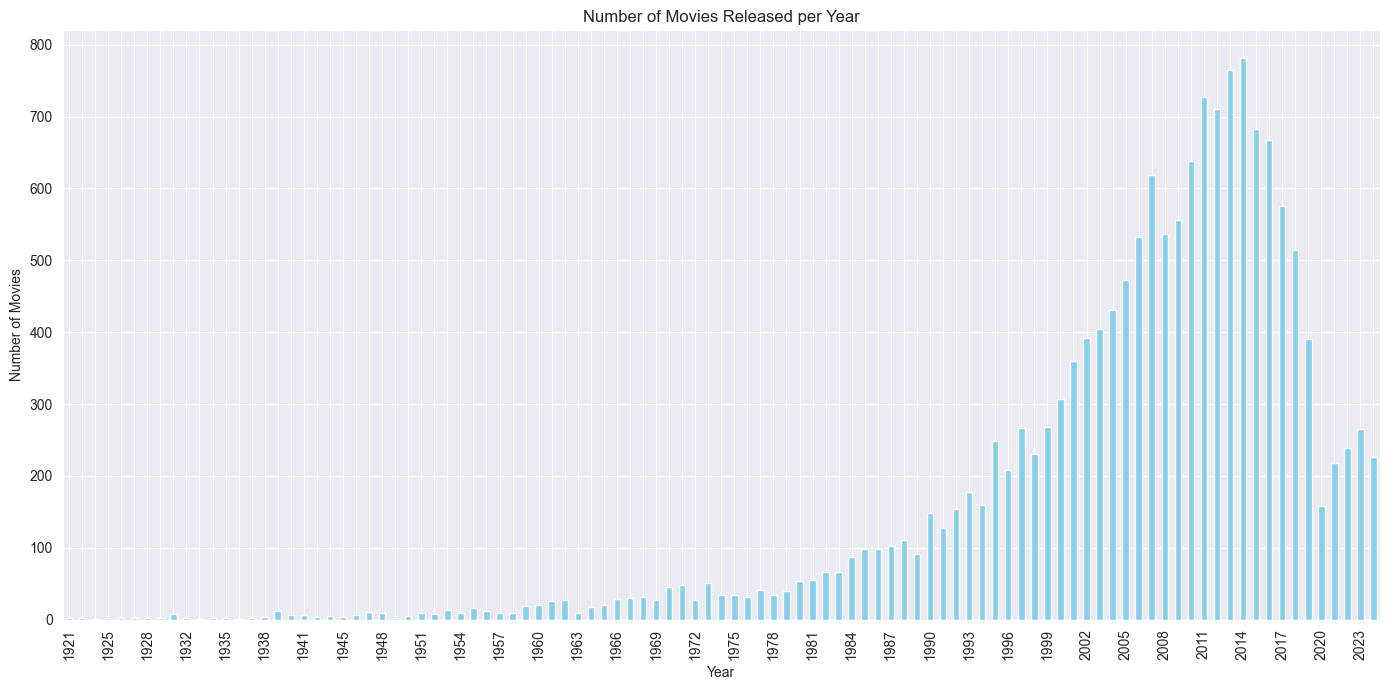

In [34]:
full_scraped_df = full_scraped_df.dropna(subset=['year'])
full_scraped_df['year'] = full_scraped_df['year'].astype(int)
full_scraped_df = full_scraped_df[full_scraped_df['year'] > 0]

year_counts = full_scraped_df['year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)

tick_positions = np.arange(len(year_counts.index))
tick_labels = [str(year) if i % 3 == 0 else '' for i, year in enumerate(year_counts.index)]
plt.xticks(ticks=tick_positions, labels=tick_labels)
plt.tight_layout()
plt.show()

In [35]:
year_counts = full_scraped_df['year'].value_counts()

top_10_years = year_counts.nlargest(10)

print("Top 10 Years with the Most Movie Releases:\n")
for year, count in top_10_years.items():
    print(f"{year}: {count} movies")

Top 10 Years with the Most Movie Releases:

2014: 781 movies
2013: 765 movies
2011: 727 movies
2012: 711 movies
2015: 683 movies
2016: 667 movies
2010: 638 movies
2007: 619 movies
2017: 576 movies
2009: 556 movies


In [36]:
year_counts = full_scraped_df['year'].value_counts().sort_index()
year_counts = year_counts[year_counts.index > 2000]
yearly_change = year_counts.pct_change() * 100

top_5_changes = yearly_change.abs().nlargest(5)

print("Top 5 Most Drastic Percentage Changes in Movie Releases (Post-2000):\n")
for year in top_5_changes.index:
    change = yearly_change[year]
    print(f"{year}: {change:.2f}% change")

Top 5 Most Drastic Percentage Changes in Movie Releases (Post-2000):

2020: -59.59% change
2021: 37.97% change
2019: -24.08% change
2007: 16.14% change
2010: 14.75% change


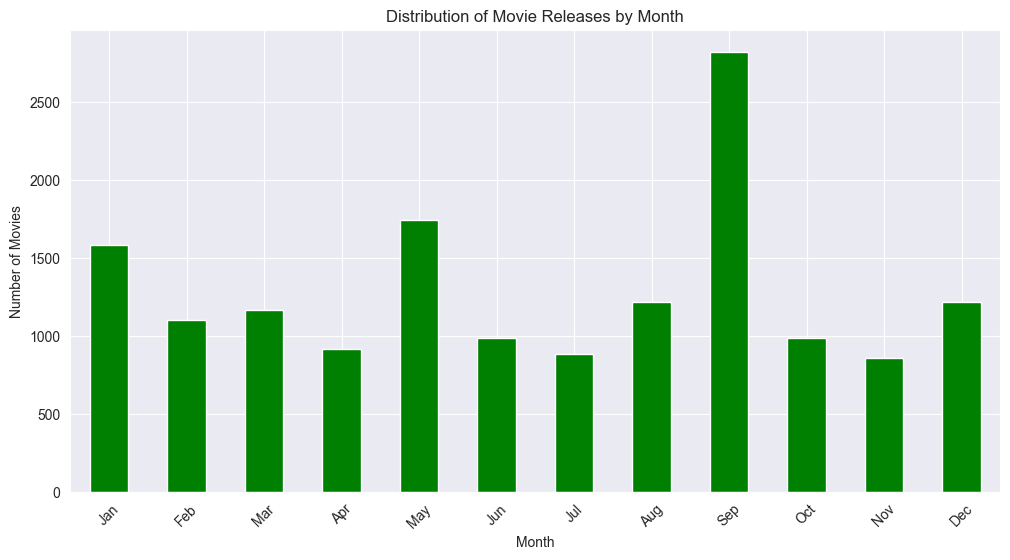

In [37]:
plt.figure(figsize=(12, 6))
full_scraped_df['premiere'].dt.month.value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


Correlation Matrix:
                         premiereYear  boxOfficeWorld  boxOfficeUSA  \
premiereYear                 1.000000        0.050609      0.084068   
boxOfficeWorld               0.050609        1.000000      0.943601   
boxOfficeUSA                 0.084068        0.943601      1.000000   
boxOfficeRestOfTheWorld      0.081585        0.981200      0.862135   
budget                       0.264277        0.681310      0.625191   
criticsNote                 -0.305557        0.046170      0.023217   
usersNote                   -0.364033        0.165325      0.132004   
year                         0.999996        0.050570      0.084036   
averageRating               -0.252173        0.177455      0.157518   
numVotes                    -0.002875        0.575803      0.595355   
duration_minutes            -0.068694        0.265355      0.202860   
critics_score_percent       -0.136042        0.118038      0.107676   
users_score_percent         -0.188298        0.160989   

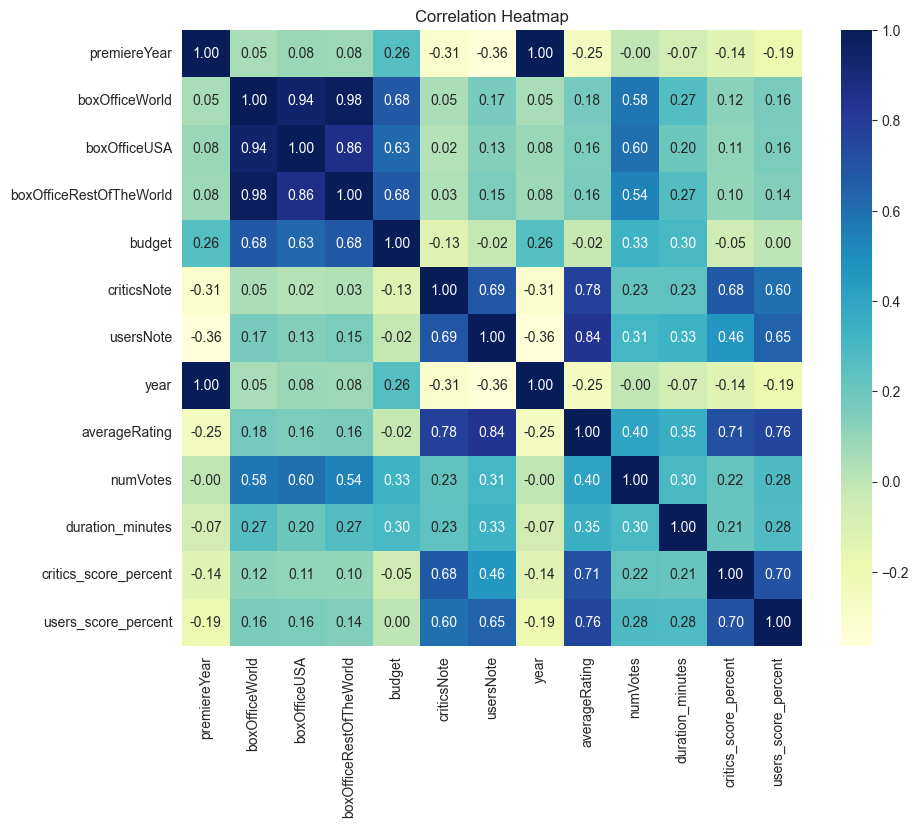

In [38]:
numeric_cols = full_scraped_df.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Filmy z większym budżetem zazwyczaj zarabiają więcej (**0.69 korelacji z BoxOfficeWorld**)
- Dochody w USA i na świecie są silnie powiązane (**0.95 korelacji** między BoxOfficeUSA a BoxOfficeWorld)
- Oceny krytyków i użytkowników są ze sobą **silnie skorelowane (0.70)**
- Średnia ocena filmu jest bardziej zgodna z ocenami użytkowników (**0.76 korelacji z users_score_percent**) niż krytyków (**0.71 korelacji**)
- Dłuższe filmy mają nieco wyższe oceny (**0.35 korelacji z averageRating**) --> użyć w modelu
- Czas trwania koreluje zarówno z ocenami użytkowników (**0.28**), jak i krytyków (**0.21**)
- Nowsze filmy otrzymują **niższe oceny od krytyków (-0.31) i użytkowników (-0.36)**  --> użyć w modelu
- Rok premiery ma **minimalny wpływ na dochody box office (-0.02)**
- Filmy z większą liczbą głosów na ogół mają wyższe oceny (**0.40 korelacji z averageRating**)
- Krytycy i użytkownicy częściej oceniają filmy o wysokiej oglądalności (**0.31 usersNote, 0.23 criticsNote z numVotes**)

Budżet i długość filmu mają wpływ na oceny i dochody, ale nowsze filmy są gorzej oceniane. Popularność filmu wiąże się z lepszymi ocenami a widzowie są często zgodni z krytykami.  

In [39]:
full_scraped_df[['hours', 'minutes']] = full_scraped_df['duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')
full_scraped_df[['hours', 'minutes']] = full_scraped_df[['hours', 'minutes']].fillna(0).astype(float)
full_scraped_df['duration_minutes'] = full_scraped_df[['hours', 'minutes']].dot([60, 1])
full_scraped_df.drop(columns=['hours', 'minutes'], inplace=True)

full_scraped_df.head()

title_x           originalTitle_x   premiere  premiereYear  \
0          Zielona mila            The Green Mile 1999-12-06          1999   
1          Zielona mila            The Green Mile 1999-12-06          1999   
2          Zielona mila            The Green Mile 1999-12-06          1999   
3  Skazani na Shawshank  The Shawshank Redemption 1994-09-10          1994   
4          Forrest Gump              Forrest Gump 1994-06-23          1994   

  duration  boxOfficeWorld  boxOfficeUSA  boxOfficeRestOfTheWorld      budget  \
0    3h 8m     286801374.0   136801374.0              150000000.0  60000000.0   
1    3h 8m     286801374.0   136801374.0              150000000.0  60000000.0   
2    3h 8m     286801374.0   136801374.0              150000000.0  60000000.0   
3   2h 22m      28884504.0    28767189.0                 117315.0  25000000.0   
4   2h 22m     678226465.0   330455270.0              347771195.0  55000000.0   

                                              studio  ...  \
0  Castle Rock Entertainment (przedstawia)  /  Da...  ...   
1  Castle Rock Entertainment (przedstawia)  /  Da...  ...   
2  Castle Rock Entertainment (przedstawia)  /  Da...  ...   
3            Castle Rock Entertainment (przedstawia)  ...   
4  Paramount Pictures (przedstawia)  /  Steve Tis...  ...   

                genres averageRating  numVotes                   title_y  \
0  Crime,Drama,Fantasy           8.6   1463244            the_green_mile   
1  Crime,Drama,Fantasy           8.6   1463244            the_green_mile   
2  Crime,Drama,Fantasy           8.6   1463244            the_green_mile   
3                Drama           9.3   2997106  the_shawshank_redemption   
4        Drama,Romance           8.8   2345005              forrest_gump   

  critics_score users_score duration_minutes critics_score_percent  \
0           79%         94%            188.0                  79.0   
1           79%         94%            188.0                  79.0   
2           79%         94%            188.0                  79.0   
3           89%         98%            142.0                  89.0   
4           75%         95%            142.0                  75.0   

  users_score_percent            cleaned_studios  
0                94.0  Castle Rock Entertainment  
1                94.0      Darkwoods Productions  
2                94.0               Warner Bros.  
3                98.0  Castle Rock Entertainment  
4                95.0         Paramount Pictures  

[5 rows x 46 columns]

In [40]:
def categorize_duration(duration):
    if duration < 90:
        return 'Short'
    elif 90 <= duration <= 150:
        return 'Medium'
    else:
        return 'Long'

full_scraped_df['duration_category'] = full_scraped_df['duration_minutes'].apply(categorize_duration)
duration_counts = full_scraped_df['duration_category'].value_counts()

print(duration_counts)

duration_category
Medium    13819
Short      1488
Long        538
Name: count, dtype: int64


In [41]:
average_duration = full_scraped_df['duration_minutes'].mean()
average_duration_hours = int(average_duration // 60)
average_duration_minutes = round(average_duration % 60)

print(f"Average duration: {average_duration_hours}h {average_duration_minutes}m")

Average duration: 1h 49m


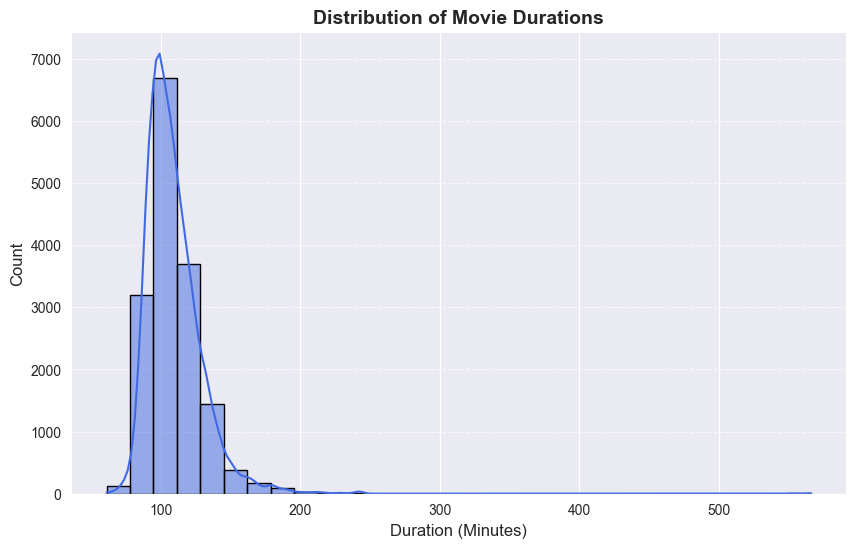

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(full_scraped_df, x="duration_minutes", bins=30, kde=True, color="royalblue", edgecolor="black")
plt.title("Distribution of Movie Durations", fontsize=14, fontweight='bold')
plt.xlabel("Duration (Minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

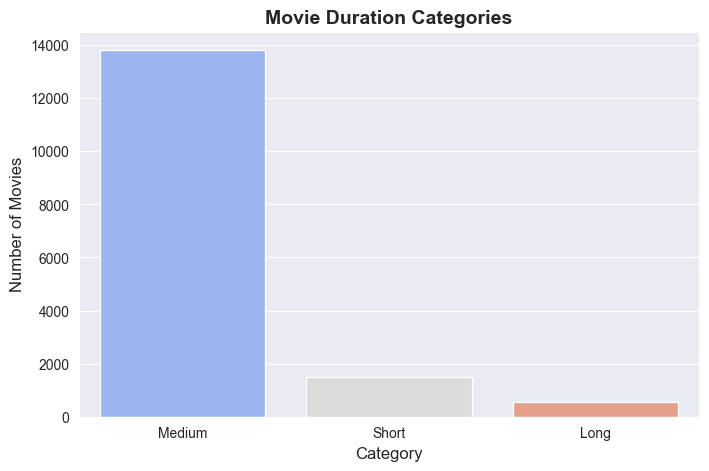

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x=duration_counts.index, y=duration_counts.values, hue=duration_counts.index, palette="coolwarm", legend=False)
plt.title("Movie Duration Categories", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.show()

In [44]:
actor_cols = [
    'mainActor1','mainActor2','mainActor3','mainActor4',
    'mainActor5','mainActor6','mainActor7','mainActor8','mainActor9'
]

all_actor_series = []
for col in actor_cols:
    if col in full_scraped_df.columns:
        all_actor_series.append(full_scraped_df[col].dropna())

all_actors = pd.concat(all_actor_series, ignore_index=True)
all_actors = all_actors[all_actors.str.lower() != "unknown"].str.strip()
actor_counts = all_actors.value_counts()

print("Top 10 most frequent actors:")
print(actor_counts.head(10))

Top 10 most frequent actors:
Robert De Niro       168
Samuel L. Jackson    160
Morgan Freeman       149
Nicolas Cage         146
Bruce Willis         145
Willem Dafoe         144
Johnny Depp          140
Liam Neeson          139
Nicole Kidman        132
Woody Harrelson      120
Name: count, dtype: int64


In [45]:
key_actor_cols = ['mainActor1', 'mainActor2', 'mainActor3']

top_actors = [
    "Robert De Niro", "Samuel L. Jackson", "Morgan Freeman", "Nicolas Cage",
    "Bruce Willis", "Willem Dafoe", "Johnny Depp", "Liam Neeson",
    "Nicole Kidman", "Woody Harrelson"
]

filtered_df = full_scraped_df[
    full_scraped_df[key_actor_cols].apply(lambda x: any(x.isin(top_actors)), axis=1)
]

if 'originalTitle_x' in filtered_df.columns:
    print("Movies Featuring the Top 10 Most Frequent Actors:\n")
    for title in sorted(filtered_df['originalTitle_x'].drop_duplicates()):  # Remove duplicates and sort
        print(title)

Movies Featuring the Top 10 Most Frequent Actors:

10 Items or Less
1408
15 Minutes
16 Blocks
5 Flights Up
8MM
A Good Day to Die Hard
A Good Person
A Most Wanted Man
A Scanner Darkly
A Time to Kill
A Walk Among the Tombstones
About My Father
Adaptation.
After the Sunset
After.Life
Alice Through the Looking Glass
Alice in Wonderland
Along Came a Spider
American Psycho
Amistad
Analyze That
Analyze This
Angel Has Fallen
Antichrist
Aquaman
Arizona Dream
Armageddon
Assassination of a High School President
Astro Boy
At Eternity's Gate
Australia
Babygirl
Backdraft
Bandits
Bangkok Dangerous
Barely Lethal
Basic
Batman Begins
Battle in Seattle
Before I Go to Sleep
Before Night Falls
Being Flynn
Being the Ricardos
Bewitched
Big Game
Birdy
Birth
Birthday Girl
Black Mass
Blow
Bombshell
Born on the Fourth of July
Boy Erased
Brazil
Bringing Out the Dead
Bruce Almighty
Captain America: The Winter Soldier
Captain Corelli's Mandolin
Captain Marvel
Casino
Catch .44
Chain Reaction
Changing Lanes
Charlie a

In [46]:
actor_key_role_counts = {actor: {col: 0 for col in key_actor_cols} for actor in top_actors}

for col in key_actor_cols:
    if col in full_scraped_df.columns:
        col_counts = full_scraped_df[col].value_counts()
        for actor in top_actors:
            actor_key_role_counts[actor][col] = col_counts.get(actor, 0)

actor_role_df = pd.DataFrame(actor_key_role_counts).T
actor_role_df.columns = ["Main Actor 1", "Main Actor 2", "Main Actor 3"]

print("\nTop 10 Actors in Main Roles:")
print(actor_role_df)


Top 10 Actors in Main Roles:
                   Main Actor 1  Main Actor 2  Main Actor 3
Robert De Niro               95            39            13
Samuel L. Jackson            49            44            21
Morgan Freeman               48            45            20
Nicolas Cage                116            22             1
Bruce Willis                 85            26            15
Willem Dafoe                 21            25            26
Johnny Depp                  95            20             8
Liam Neeson                  68            22            17
Nicole Kidman                59            37            21
Woody Harrelson              18            34            39


In [47]:
if 'mainActor1' in full_scraped_df.columns:
    most_frequent_main_actor = full_scraped_df['mainActor1'].value_counts().idxmax()
    
    filtered_movies = full_scraped_df[full_scraped_df['mainActor1'] == most_frequent_main_actor]
    
    print(f"Most Frequent Main Actor: {most_frequent_main_actor}\n")
    print("Movies Featuring the Main Actor:\n")
    
    if 'originalTitle_x' in filtered_movies.columns:
        for title in sorted(filtered_movies['originalTitle_x'].drop_duplicates()):  # Remove duplicates & sort
            print(title)

Most Frequent Main Actor: Nicolas Cage

Movies Featuring the Main Actor:

8MM
Adaptation.
Bangkok Dangerous
Bringing Out the Dead
Captain Corelli's Mandolin
City of Angels
Color Out of Space
Con Air
Dream Scenario
Drive Angry
Ghost Rider
Ghost Rider: Spirit of Vengeance
Guarding Tess
It Could Happen to You
Joe
Knowing
Leaving Las Vegas
Left Behind
Lord of War
Mandy
Matchstick Men
Mom and Dad
National Treasure
National Treasure: Book of Secrets
Next
Pay the Ghost
Pig
Raising Arizona
Red Rock West
Season of the Witch
Seeking Justice
Snake Eyes
Stolen
The Croods
The Croods: A New Age
The Family Man
The Frozen Ground
The Trust
The Unbearable Weight of Massive Talent
Trespass
USS Indianapolis: Men of Courage
Vampire's Kiss
Wild at Heart
Windtalkers
World Trade Center


In [48]:
if {'criticsNote', 'usersNote', 'boxOfficeWorld', 'originalTitle_x'}.issubset(filtered_movies.columns):
    highest_critics_movie = filtered_movies.loc[filtered_movies['criticsNote'].idxmax(), ['originalTitle_x', 'criticsNote']]
    highest_users_movie = filtered_movies.loc[filtered_movies['usersNote'].idxmax(), ['originalTitle_x', 'usersNote']]
    highest_box_office_movie = filtered_movies.loc[filtered_movies['boxOfficeWorld'].idxmax(), ['originalTitle_x', 'boxOfficeWorld']]

    print("\nHighest Rated by Critics where Nicolas Cage was featured as 1st Actor:")
    print(f"{highest_critics_movie['originalTitle_x']} (Critics Note: {highest_critics_movie['criticsNote']})")

    print("\nHighest Rated by Users where Nicolas Cage was featured as 1st Actor::")
    print(f"{highest_users_movie['originalTitle_x']} (Users Note: {highest_users_movie['usersNote']})")

    print("\nHighest Box Office Revenue where Nicolas Cage was featured as 1st Actor::")
    print(f"{highest_box_office_movie['originalTitle_x']} (Box Office: {highest_box_office_movie['boxOfficeWorld']})")

else:
    print("missing")


Highest Rated by Critics where Nicolas Cage was featured as 1st Actor:
Wild at Heart (Critics Note: 7.5)

Highest Rated by Users where Nicolas Cage was featured as 1st Actor::
Lord of War (Users Note: 7.6)

Highest Box Office Revenue where Nicolas Cage was featured as 1st Actor::
The Croods (Box Office: 587235983.0)


In [49]:
if {'director', 'boxOfficeWorld'}.issubset(full_scraped_df.columns):
    director_performance = (
        full_scraped_df.groupby('director')['boxOfficeWorld']
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )
    
    print("\nTop 10 Directors by Average Worldwide Box Office:\n")
    print(director_performance)
else:
    print("missing")


Top 10 Directors by Average Worldwide Box Office:

director
Anthony Russo           1.472730e+09
Jennifer Lee            1.453683e+09
Colin Trevorrow         1.336758e+09
James Cameron           1.267581e+09
Anna Boden              1.131416e+09
Josh Cooley             1.073395e+09
David G. Derrick Jr.    1.026900e+09
Byron Howard            1.025522e+09
Kyle Balda              1.021660e+09
Pierre Coffin           9.707660e+08
Name: boxOfficeWorld, dtype: float64


In [50]:
if {'director', 'boxOfficeWorld', 'originalTitle_x', 'criticsNote', 'usersNote'}.issubset(full_scraped_df.columns):
    
    print("\nMost Profitable Film for Each Top Director (with Ratings):\n")
    
    for director in director_performance.index:
        highest_grossing_film = full_scraped_df[full_scraped_df['director'] == director].nlargest(1, 'boxOfficeWorld')

        if not highest_grossing_film.empty:
            film_title = highest_grossing_film.iloc[0]['originalTitle_x']
            film_revenue = highest_grossing_film.iloc[0]['boxOfficeWorld']
            critics_score = highest_grossing_film.iloc[0]['criticsNote']
            users_score = highest_grossing_film.iloc[0]['usersNote']
            
            print(f"{director}: {film_title}")
            print(f"   Box Office: {film_revenue}")
            print(f"   Critics' Rating: {critics_score}")
            print(f"   Users' Rating: {users_score}\n")
else:
    print("missing")


Most Profitable Film for Each Top Director (with Ratings):

Anthony Russo: Avengers: Endgame
   Box Office: 2799439100.0
   Critics' Rating: 7.0
   Users' Rating: 8.0

Jennifer Lee: Frozen II
   Box Office: 1453683476.0
   Critics' Rating: 5.9
   Users' Rating: 6.8

Colin Trevorrow: Jurassic World
   Box Office: 1671537444.0
   Critics' Rating: 5.2
   Users' Rating: 6.6

James Cameron: Avatar
   Box Office: 2923706026.0
   Critics' Rating: 6.5
   Users' Rating: 7.4

Anna Boden: Captain Marvel
   Box Office: 1131416446.0
   Critics' Rating: 6.3
   Users' Rating: 6.7

Josh Cooley: Toy Story 4
   Box Office: 1073394593.0
   Critics' Rating: 7.4
   Users' Rating: 7.3

David G. Derrick Jr.: Moana 2
   Box Office: 1026899678.0
   Critics' Rating: 5.7
   Users' Rating: 6.5

Byron Howard: Zootopia
   Box Office: 1025521689.0
   Critics' Rating: 7.8
   Users' Rating: 7.9

Kyle Balda: Minions
   Box Office: 1159444662.0
   Critics' Rating: 4.4
   Users' Rating: 6.8

Pierre Coffin: Despicable Me

In [51]:
box_office_analysis = {
    'boxOfficeWorld': {
        'Lowest': full_scraped_df['boxOfficeWorld'].min(),
        'Mean': full_scraped_df['boxOfficeWorld'].mean(),
        'Highest': full_scraped_df['boxOfficeWorld'].max(),
    },
    'boxOfficeUSA': {
        'Lowest': full_scraped_df['boxOfficeUSA'].min(),
        'Mean': full_scraped_df['boxOfficeUSA'].mean(),
        'Highest': full_scraped_df['boxOfficeUSA'].max(),
    },
    'boxOfficeRestOfTheWorld': {
        'Lowest': full_scraped_df['boxOfficeRestOfTheWorld'].min(),
        'Mean': full_scraped_df['boxOfficeRestOfTheWorld'].mean(),
        'Highest': full_scraped_df['boxOfficeRestOfTheWorld'].max(),
    }
}

for column, values in box_office_analysis.items():
    print(f"\nAnalysis for {column}:")
    print(f"Lowest: {values['Lowest']:,.2f}")
    print(f"Mean: {values['Mean']:,.2f}")
    print(f"Highest: {values['Highest']:,.2f}")


Analysis for boxOfficeWorld:
Lowest: 1,009,474.00
Mean: 133,605,609.01
Highest: 2,923,706,026.00

Analysis for boxOfficeUSA:
Lowest: 742.00
Mean: 53,286,020.49
Highest: 936,662,225.00

Analysis for boxOfficeRestOfTheWorld:
Lowest: 347.00
Mean: 75,955,937.48
Highest: 2,138,484,377.00


In [52]:
country_analysis = full_scraped_df['productionCountry'].value_counts()
top_10_countries = country_analysis.head(10)

print("Top 10 countries with the most film productions:")
print(top_10_countries)

Top 10 countries with the most film productions:
productionCountry
USA                      7889
USA,  Wielka Brytania     629
Wielka Brytania           544
USA,  Niemcy              390
USA,  Kanada              301
Wielka Brytania,  USA     275
Francja                   268
Polska                    195
USA,  Australia           169
USA,  Francja             154
Name: count, dtype: int64


In [53]:
full_scraped_df['director_equals_scenario'] = full_scraped_df['director'] == full_scraped_df['scenario']
director_and_scenario_count = full_scraped_df['director_equals_scenario'].sum()

print(f"The number of films where the director is also the scriptwriter: {director_and_scenario_count}")

The number of films where the director is also the scriptwriter: 5891


In [54]:
top_10_directors = full_scraped_df['director'].value_counts().head(10)

print("\nTop 10 Directors by Number of Films Released:")
print(top_10_directors)


Top 10 Directors by Number of Films Released:
director
Woody Allen          97
Clint Eastwood       86
Ridley Scott         84
Steven Spielberg     75
Ron Howard           56
Steven Soderbergh    55
Martin Scorsese      55
Joel Schumacher      44
Kenneth Branagh      44
Robert Zemeckis      43
Name: count, dtype: int64


żaden z powyższych reżyserów nie znalazł się w czołówce "Box Office World

In [55]:
top_10_scenarios = (
    full_scraped_df.loc[full_scraped_df['scenario'].str.lower() != "unknown", 'scenario']
    .value_counts()
    .head(10)
)

print("\nTop 10 Scriptwriters (Scenario):")
print(top_10_scenarios)


Top 10 Scriptwriters (Scenario):
scenario
Woody Allen           97
Luc Besson            77
Brian Helgeland       46
Sylvester Stallone    38
Quentin Tarantino     36
Steven Knight         34
Jim Jarmusch          33
Joel Coen             32
William Goldman       30
M. Night Shyamalan    29
Name: count, dtype: int64


In [56]:
woody_allen_films = full_scraped_df[
    (full_scraped_df['director'] == "Woody Allen") & 
    (full_scraped_df['scenario'] == "Woody Allen")
]

if not woody_allen_films.empty:
    print("\nWoody Allen was both the director and scriptwriter in the following films:\n")
    for title in woody_allen_films['originalTitle_x'].drop_duplicates().sort_values():
        print(title)
else:
    print("\nWoody Allen has no films where he is both the director and scriptwriter.")


Woody Allen was both the director and scriptwriter in the following films:

Alice
Annie Hall
Another Woman
Anything Else
Bananas
Blue Jasmine
Broadway Danny Rose
Bullets Over Broadway
Café Society
Cassandra's Dream
Celebrity
Crimes and Misdemeanors
Deconstructing Harry
Everyone Says I Love You
Everything You Always Wanted to Know About Sex * But Were Afraid to Ask
Hannah and Her Sisters
Hollywood Ending
Interiors
Irrational Man
Magic in the Moonlight
Manhattan
Manhattan Murder Mystery
Match Point
Melinda and Melinda
Midnight in Paris
Mighty Aphrodite
Radio Days
Rifkin's Festival
Scoop
Shadows and Fog
Small Time Crooks
Stardust Memories
Sweet and Lowdown
Take the Money and Run
To Rome with Love
Vicky Cristina Barcelona
Whatever Works
Wonder Wheel
You Will Meet a Tall Dark Stranger
Zelig


In [57]:
full_scraped_df

title_x           originalTitle_x   premiere  \
0              Zielona mila            The Green Mile 1999-12-06   
1              Zielona mila            The Green Mile 1999-12-06   
2              Zielona mila            The Green Mile 1999-12-06   
3      Skazani na Shawshank  The Shawshank Redemption 1994-09-10   
4              Forrest Gump              Forrest Gump 1994-06-23   
...                     ...                       ...        ...   
15840     Wszystko o Adamie                About Adam 2000-01-28   
15841     Wszystko o Adamie                About Adam 2000-01-28   
15842     Skryta namiętność             Untamed Heart 1993-02-12   
15843   Zemsta rewolwerowca      The Harder They Fall 2021-10-06   
15844   Zemsta rewolwerowca      The Harder They Fall 2021-10-06   

       premiereYear duration  boxOfficeWorld  boxOfficeUSA  \
0              1999    3h 8m     286801374.0   136801374.0   
1              1999    3h 8m     286801374.0   136801374.0   
2              1999    3h 8m     286801374.0   136801374.0   
3              1994   2h 22m      28884504.0    28767189.0   
4              1994   2h 22m     678226465.0   330455270.0   
...             ...      ...             ...           ...   
15840          2000   1h 45m             NaN           NaN   
15841          2000   1h 45m             NaN           NaN   
15842          1993   1h 42m             NaN    18898806.0   
15843          2021   2h 10m             NaN           NaN   
15844          2021   2h 10m             NaN           NaN   

       boxOfficeRestOfTheWorld      budget  \
0                  150000000.0  60000000.0   
1                  150000000.0  60000000.0   
2                  150000000.0  60000000.0   
3                     117315.0  25000000.0   
4                  347771195.0  55000000.0   
...                        ...         ...   
15840                      NaN         NaN   
15841                      NaN         NaN   
15842                      NaN         NaN   
15843                      NaN         NaN   
15844                      NaN         NaN   

                                                  studio  ...  numVotes  \
0      Castle Rock Entertainment (przedstawia)  /  Da...  ...   1463244   
1      Castle Rock Entertainment (przedstawia)  /  Da...  ...   1463244   
2      Castle Rock Entertainment (przedstawia)  /  Da...  ...   1463244   
3                Castle Rock Entertainment (przedstawia)  ...   2997106   
4      Paramount Pictures (przedstawia)  /  Steve Tis...  ...   2345005   
...                                                  ...  ...       ...   
15840  Bórd Scannán na hÉireann  /  British Broadcast...  ...      6854   
15841  Bórd Scannán na hÉireann  /  British Broadcast...  ...      6854   
15842                          Metro-Goldwyn-Mayer (MGM)  ...     16004   
15843                Netflix  /  Overbrook Entertainment  ...     73288   
15844                Netflix  /  Overbrook Entertainment  ...     73288   

                        title_y  critics_score users_score duration_minutes  \
0                the_green_mile            79%         94%            188.0   
1                the_green_mile            79%         94%            188.0   
2                the_green_mile            79%         94%            188.0   
3      the_shawshank_redemption            89%         98%            142.0   
4                  forrest_gump            75%         95%            142.0   
...                         ...            ...         ...              ...   
15840                about_adam            68%         47%            105.0   
15841                about_adam            68%         47%            105.0   
15842             untamed_heart            60%         76%            102.0   
15843      the_harder_they_fall            88%         93%            130.0   
15844      the_harder_they_fall            88%         93%            130.0   

      critics_score_percent users_score_percent  \
0   

In [58]:
#Duration to Ratings (Critics & Users)
duration_critics_corr = full_scraped_df['duration_minutes'].corr(full_scraped_df['criticsNote'])
duration_users_corr = full_scraped_df['duration_minutes'].corr(full_scraped_df['usersNote'])

print(f"Correlation between Duration and Critics' Ratings: {duration_critics_corr:.2f}")
print(f"Correlation between Duration and Users' Ratings: {duration_users_corr:.2f}")

Correlation between Duration and Critics' Ratings: 0.23
Correlation between Duration and Users' Ratings: 0.33


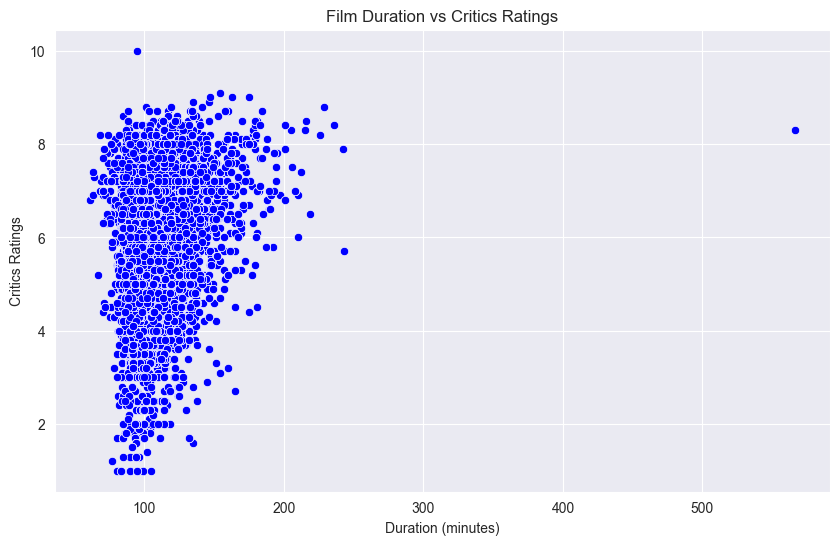

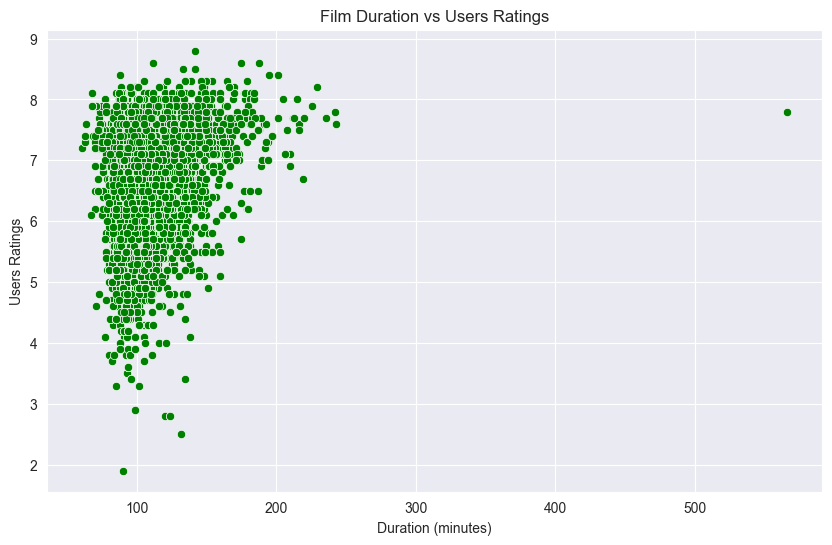

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=full_scraped_df['duration_minutes'], y=full_scraped_df['criticsNote'], color='blue')
plt.title('Film Duration vs Critics Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Critics Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=full_scraped_df['duration_minutes'], y=full_scraped_df['usersNote'], color='green')
plt.title('Film Duration vs Users Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Users Ratings')
plt.show()

In [60]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

duration_outliers = detect_outliers(full_scraped_df, 'duration_minutes')

long_duration_outliers = duration_outliers[['originalTitle_x', 'duration_minutes']].drop_duplicates()
long_duration_outliers = long_duration_outliers[long_duration_outliers['duration_minutes'] > 190]
long_duration_outliers = long_duration_outliers.sort_values(by='duration_minutes', ascending=False)

if not long_duration_outliers.empty:
    print("\nFilms with Duration Above 190 Minutes:\n")
    for index, row in long_duration_outliers.iterrows():
        print(f"{row['originalTitle_x']} - {row['duration_minutes']} minutes")
else:
    print("")


Films with Duration Above 190 Minutes:

Shoah - 566.0 minutes
Cleopatra - 243.0 minutes
Hamlet - 242.0 minutes
La belle noiseuse - 236.0 minutes
Once Upon a Time in America - 229.0 minutes
Gone with the Wind - 226.0 minutes
The Ten Commandments - 220.0 minutes
Heaven's Gate - 219.0 minutes
Lawrence of Arabia - 216.0 minutes
Mohabbatein - 216.0 minutes
The Brutalist - 215.0 minutes
Jodhaa Akbar - 213.0 minutes
Ben-Hur - 212.0 minutes
The Irishman - 210.0 minutes
Kabhi Khushi Kabhie Gham... - 210.0 minutes
George Harrison: Living in the Material World - 208.0 minutes
Killers of the Flower Moon - 206.0 minutes
Andrey Rublyov - 205.0 minutes
Giant - 201.0 minutes
The Lord of the Rings: The Return of the King - 201.0 minutes
Jeanne Dielman, 23 Quai du Commerce, 1080 Bruxelles - 201.0 minutes
Doctor Zhivago - 197.0 minutes
Schindler's List - 195.0 minutes
Reds - 194.0 minutes
Titanic - 194.0 minutes
The Right Stuff - 193.0 minutes
Kabhi Alvida Naa Kehna - 193.0 minutes
Avatar: The Way of Wa

In [61]:
boxOfficeWorld_critics_corr = full_scraped_df['boxOfficeWorld'].corr(full_scraped_df['criticsNote'])
boxOfficeWorld_users_corr = full_scraped_df['boxOfficeWorld'].corr(full_scraped_df['usersNote'])

boxOfficeUSA_critics_corr = full_scraped_df['boxOfficeUSA'].corr(full_scraped_df['criticsNote'])
boxOfficeUSA_users_corr = full_scraped_df['boxOfficeUSA'].corr(full_scraped_df['usersNote'])

boxOfficeRestOfTheWorld_critics_corr = full_scraped_df['boxOfficeRestOfTheWorld'].corr(full_scraped_df['criticsNote'])
boxOfficeRestOfTheWorld_users_corr = full_scraped_df['boxOfficeRestOfTheWorld'].corr(full_scraped_df['usersNote'])

print(f"Correlation between Box Office World and Critics' Ratings: {boxOfficeWorld_critics_corr:.2f}")
print(f"Correlation between Box Office World and Users' Ratings: {boxOfficeWorld_users_corr:.2f}")
print(f"Correlation between Box Office USA and Critics' Ratings: {boxOfficeUSA_critics_corr:.2f}")
print(f"Correlation between Box Office USA and Users' Ratings: {boxOfficeUSA_users_corr:.2f}")
print(f"Correlation between Box Office Rest of the World and Critics' Ratings: {boxOfficeRestOfTheWorld_critics_corr:.2f}")
print(f"Correlation between Box Office Rest of the World and Users' Ratings: {boxOfficeRestOfTheWorld_users_corr:.2f}")

Correlation between Box Office World and Critics' Ratings: 0.05
Correlation between Box Office World and Users' Ratings: 0.17
Correlation between Box Office USA and Critics' Ratings: 0.02
Correlation between Box Office USA and Users' Ratings: 0.13
Correlation between Box Office Rest of the World and Critics' Ratings: 0.03
Correlation between Box Office Rest of the World and Users' Ratings: 0.15


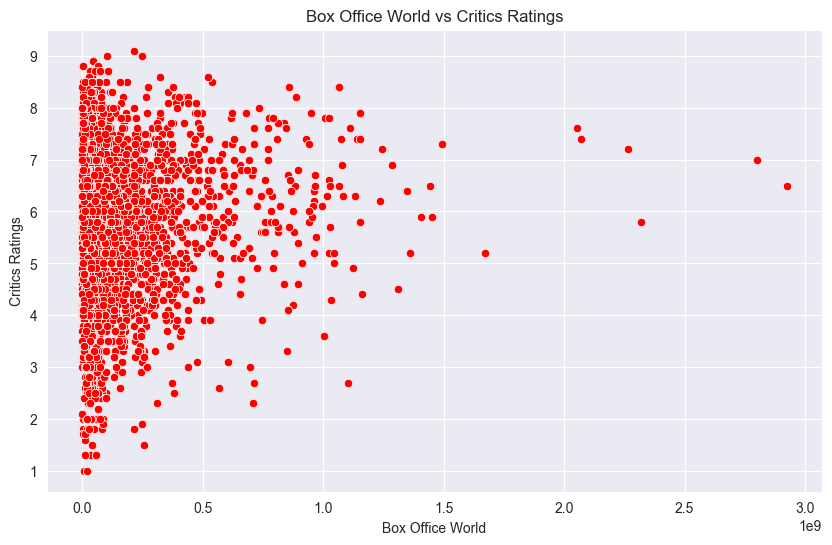

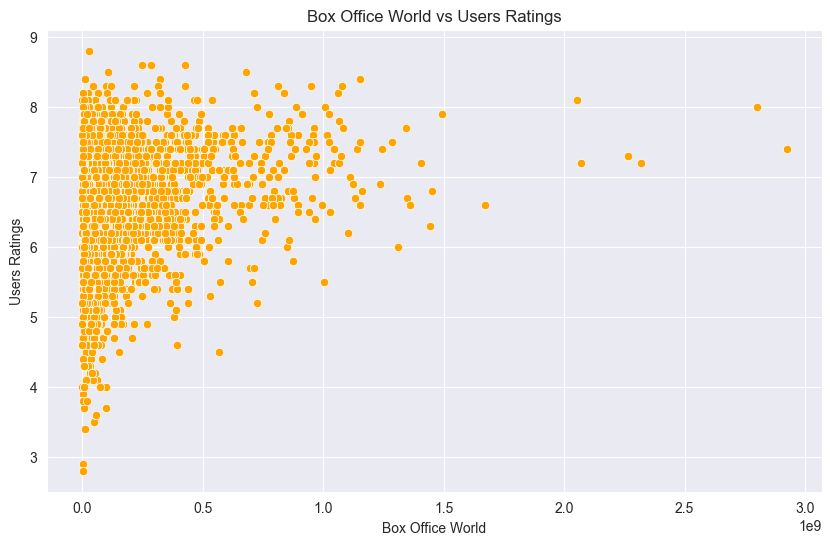

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=full_scraped_df['boxOfficeWorld'], y=full_scraped_df['criticsNote'], color='red')
plt.title('Box Office World vs Critics Ratings')
plt.xlabel('Box Office World')
plt.ylabel('Critics Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=full_scraped_df['boxOfficeWorld'], y=full_scraped_df['usersNote'], color='orange')
plt.title('Box Office World vs Users Ratings')
plt.xlabel('Box Office World')
plt.ylabel('Users Ratings')
plt.show()

In [63]:
studio_boxoffice = full_scraped_df.groupby('cleaned_studios').agg(
    films_count=('cleaned_studios', 'size'),
    total_boxoffice=('boxOfficeWorld', 'sum')
).reset_index()

studio_boxoffice_sorted = studio_boxoffice.sort_values(by='films_count', ascending=False)

print(studio_boxoffice_sorted.head())

                             cleaned_studios  films_count  total_boxoffice
5157                            Warner Bros.          337     5.058978e+10
5062                      Universal Pictures          331     5.398413e+10
3987                      Paramount Pictures          265     4.214017e+10
4884                                     The          209     1.137304e+10
5012  Twentieth Century Fox Film Corporation          176     2.639782e+10


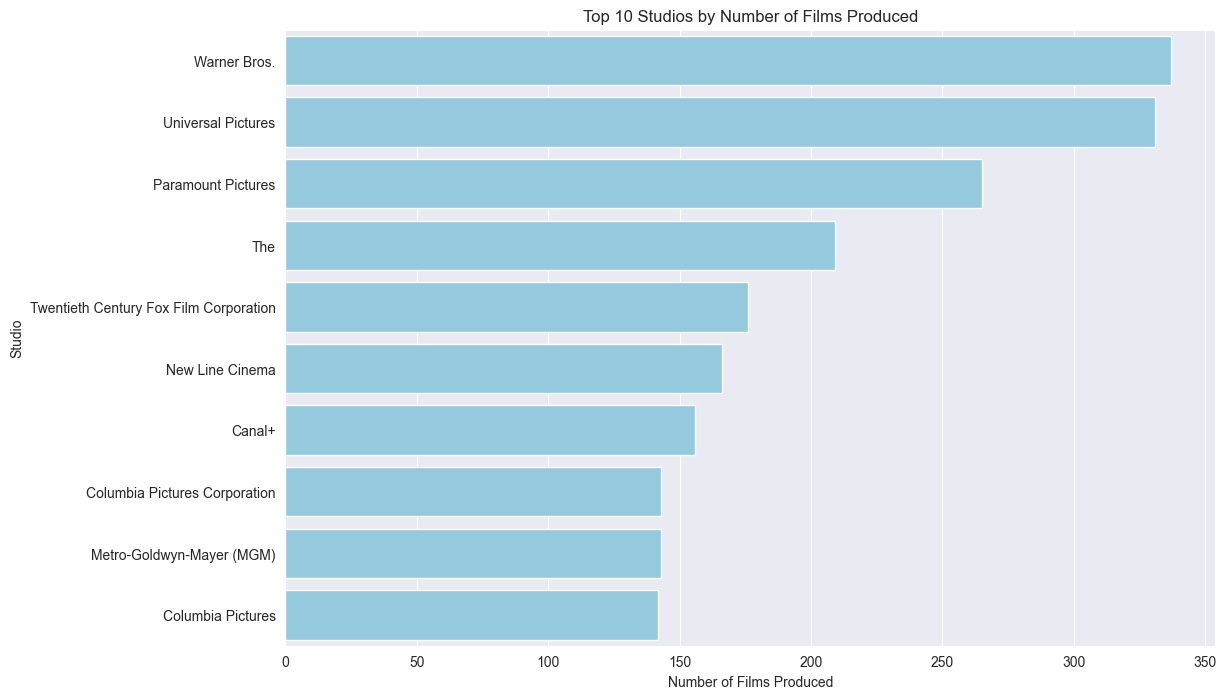

In [64]:
top_10_studios_by_film_count = studio_boxoffice_sorted.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='films_count', y='cleaned_studios', data=top_10_studios_by_film_count, color='skyblue')
plt.title('Top 10 Studios by Number of Films Produced')
plt.xlabel('Number of Films Produced')
plt.ylabel('Studio')
plt.show()

In [65]:
films_by_studio = full_scraped_df[full_scraped_df['cleaned_studios'].str.strip().eq("The")]

print(films_by_studio[['title_x', 'cleaned_studios']])

                           title_x cleaned_studios
6                     Forrest Gump             The
62                   Bękarty wojny             The
87                          Django             The
113             Więzień nienawiści             The
146    Braveheart - Waleczne Serce             The
...                            ...             ...
15461             Wichrowe wzgórza             The
15512             Sztuka kradzieży             The
15576                  Odległy ląd             The
15718               Daleko od niej             The
15821                   Moje córki             The

[209 rows x 2 columns]


In [66]:
high_rated_studios = full_scraped_df[full_scraped_df['averageRating'] >= 8]

top_studios_by_high_rated_films = high_rated_studios.groupby('cleaned_studios').size().reset_index(name='high_rated_film_count')
top_studios_sorted = top_studios_by_high_rated_films.sort_values(by='high_rated_film_count', ascending=False)
top_10_studios = top_studios_sorted.head(10)

print(top_10_studios)

                   cleaned_studios  high_rated_film_count
435                   Warner Bros.                     24
398                            The                     20
434           Walt Disney Pictures                     19
421             Universal Pictures                     17
311             Paramount Pictures                     14
323        Pixar Animation Studios                     10
419                 United Artists                      9
276      Metro-Goldwyn-Mayer (MGM)                      9
284                  Miramax Films                      9
117  Columbia Pictures Corporation                      7


In [67]:
highest_rated_movies = full_scraped_df.sort_values(by='averageRating', ascending=False).head(10)
lowest_rated_movies = full_scraped_df.sort_values(by='averageRating', ascending=True).head(10)
highest_rated_movies = highest_rated_movies[['title_x', 'averageRating', 'cleaned_studios']]
lowest_rated_movies = lowest_rated_movies[['title_x', 'averageRating', 'cleaned_studios']]

print("Top 10 Highest Rated Movies:")
print(highest_rated_movies)

print("\n" + "="*50 + "\n")

print("Top 10 Lowest Rated Movies:")
print(lowest_rated_movies)

Top 10 Highest Rated Movies:
                             title_x  averageRating            cleaned_studios
3               Skazani na Shawshank            9.3  Castle Rock Entertainment
44                  Ojciec chrzestny            9.2         Paramount Pictures
45                  Ojciec chrzestny            9.2         Alfran Productions
103  Władca Pierścieni: Powrót króla            9.0              WingNut Films
88                    Mroczny Rycerz            9.0               Warner Bros.
68                  Lista Schindlera            9.0       Amblin Entertainment
67                  Lista Schindlera            9.0         Universal Pictures
89                    Mroczny Rycerz            9.0                  DC Comics
90                    Mroczny Rycerz            9.0         Legendary Pictures
101  Władca Pierścieni: Powrót króla            9.0            New Line Cinema


Top 10 Lowest Rated Movies:
                                  title_x  averageRating  \
12280  Justi

Model: Random Forest Regression

przeszkolony na zbiorze danych zawierającym informacje o filmach, takie jak rok premiery, czas trwania, budżet, liczba głosów, kraj produkcji, reżyser, studio oraz główny aktor

Cel: kreślenie które z tych czynników mają największy wpływ na ocenę filmu oraz jak dobrze można przewidzieć ocenę na podstawie dostępnych informacji

In [68]:
features = ['year', 'duration_minutes', 'director', 'cleaned_studios', 'mainActor1', 'numVotes', 'productionCountry', 'budget']
X = full_scraped_df[features]
y = full_scraped_df['averageRating']

X = pd.get_dummies(X, columns=['director', 'cleaned_studios', 'mainActor1', 'productionCountry'], drop_first=True)
X = X.fillna(X.median())

for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].fillna(X[col].mode()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Evaluation:")
print(f"R-squared: {r2_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}\n")

predictions = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred_rf})
print(predictions.head())

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

Random Forest Regression Model Evaluation:
R-squared: 0.88
Mean Squared Error: 0.09
Mean Absolute Error: 0.18

      Actual Rating  Predicted Rating
7145            7.1             6.971
169             8.1             8.006
2099            7.1             7.086
3948            6.8             6.886
5773            7.3             7.069
Feature Importance (Random Forest):
                                   Feature  Importance
2                                 numVotes    0.264133
1                         duration_minutes    0.129733
0                                     year    0.119632
3                                   budget    0.100395
11056                productionCountry_USA    0.013954
...                                    ...         ...
4303          cleaned_studios_DACFILM Rome    0.000000
4304   cleaned_studios_DAntoni Productions    0.000000
4313                   cleaned_studios_DFM    0.000000
4321                   cleaned_studios_DPI    0.000000
5734             cle

Model **dobrze radzi sobie z przewidywaniem ocen filmów** - pozwala **trafnie oszacować, jak dany film może zostać oceniony**, biorąc pod uwagę jego cechy:

- R² = 0,87**

Model wyjaśnia **87% zmienności ocen filmów**, co oznacza, że dobrze uchwycił zależności między cechami a ocenami

- MSE = 0,10**

Średni błąd kwadratowy między rzeczywistymi a przewidywanymi ocenami jest niski, co wskazuje na **niewielkie błędy** w prognozach

- MAE = 0,19**

Średnio model popełnia błąd na poziomie **0,19 punktu w skali ocen**, co świadczy o wysokiej dokładności

Porównanie rzeczywistych i przewidywanych ocen pokazuje że różnice są niewielkie, co oznacza, że model jest **wiarygodny w prognozowaniu ocen filmów**

In [69]:
selected_features = ['year', 'duration_minutes', 'director', 'cleaned_studios', 'mainActor1', 'numVotes', 'productionCountry', 'budget']
selected_feature_importance = feature_importance[feature_importance['Feature'].str.startswith(tuple(selected_features))]

print("\nFeature Importance for Selected Features:\n")
print(selected_feature_importance.to_string(index=False))


Feature Importance for Selected Features:

                                                                                                                                                                                                             Feature   Importance
                                                                                                                                                                                                            numVotes 2.641333e-01
                                                                                                                                                                                                    duration_minutes 1.297332e-01
                                                                                                                                                                                                                year 1.196320e-01
                                                    

- Największy wpływ ma liczba głosów (numVotes), która odpowiada za 26,48% ważności modelu. Filmy z większą liczbą ocen mają bardziej stabilne i wiarygodne oceny, ponieważ reprezentują opinię większej grupy widzów

- Czas trwania filmu (duration_minutes) ma wpływ na poziomie 12,68%. Dłuższe filmy często zawierają bardziej rozbudowaną narrację i głębszą fabułę, co może prowadzić do lepszych ocen

- Rok wydania odpowiada za 12,40% wpływu na ocenę filmu. Starsze i nowsze produkcje są oceniane inaczej, co może wynikać ze zmieniających się gustów widzów oraz standardów kinematografii

- Budżet ma istotny wpływ (9,94%). Produkcje z większym budżetem zazwyczaj charakteryzują się lepszą jakością techniczną, efektami specjalnymi i promocją, co może przekładać się na wyższe oceny

- Kraj produkcji odgrywa niewielką rolę (1,36%). Filmy wyprodukowane w USA mają lekką przewagę nad innymi, ale kraj pochodzenia sam w sobie nie jest decydującym czynnikiem oceny

- Reżyserzy i aktorzy mają znacznie mniejszy wpływ na ocenę filmu. Przykładowo, reżyserzy tacy jak Jason Friedberg, Uwe Boll czy Martin Brest mają niewielki wpływ na wynik końcowy. Podobnie, obecność aktorów takich jak Justin Bieber (wnioskowanie o popularności), Jamie Kennedy czy Tommy Wiseau może mieć pewien wpływ, ale nie jest to kluczowy czynnik decydujący o ocenie filmu

- Studia filmowe mają najmniejsze znaczenie, co oznacza, że to, kto wyprodukował film, nie jest tak istotne jak jego jakość czy sposób, w jaki został odebrany przez widzów

***
WNIOSKI

Najważniejszym czynnikiem wpływającym na ocenę filmu jest **liczba głosów**, ponieważ większa liczba ocen stabilizuje wynik i czyni go bardziej reprezentatywnym. Długość filmu oraz budżet również mają istotne znaczenie, co sugeruje, że widzowie bardziej doceniają dobrze rozwinięte narracje oraz wysoką jakość produkcji.

Rok wydania filmu wpływa na ocenę, co może odzwierciedlać zmiany w gustach publiczności i ewolucję standardów filmowych. Natomiast kraj produkcji, nazwisko reżysera oraz obsada aktorska mają stosunkowo niewielki wpływ na wynik końcowy, co oznacza, że sukces filmu zależy bardziej od jego jakości niż od znanych nazwisk.

Analiza potwierdza, że najważniejsze dla wysokiej oceny filmu jest zaangażowanie widzów i ogólna jakość produkcji, a nie same aspekty związane z miejscem produkcji czy obsadą.